# Business case: Earthquake damage prediction.
**Create a predictive model in such a way that the objective is to predict the ordinal variable “damage_grade”.**

# **Problem Statement**

**Task 1**:-Prepare a complete data analysis report on the given data.

**Task 2**:-Create a predictive model in such a way that the objective is to predict the ordinal variable “damage_grade”. This column presents the level of damage grade affected by the earthquake.

**Task3:**-Suggestions to the Seismologists to avoid  earthquake event leading  to significant damage in many buildings


We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:
* 1 represents low damage
* 2 represents a medium amount of damage
* 3 represents almost complete destruction


# Import basic libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[4,4]

# Load dataset

In [ ]:
data1 = pd.read_csv("train_values.csv")
data2 = pd.read_csv("train_labels.csv")
# data = data1 + data2
data1


building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1                         2   10                8                  7   
2                         2   10                5                  5   
3                         2   10                6                  5   
4                         3   30                8                  9   
...                     ...  ...              ...                ...   
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

       land_surface_condition foundation_type  ...  \
0                           t               r  ...   
1                           o               r  ...   
2                           t               r  ...   
3                           t               r  ...   
4                           t               r  ...   
...                       ...             ...  ...   
260596                      n               r  ...   
260597                      t               r  ...   
260598                      t               r  ...   
260599                      t               r  ...   
260600                      n               r  ...   

       has_secondary_use_agriculture has_secondary_use_hotel  \
0                                  0                       0   
1                                  0                       0   
2                                  0                       0   
3                                  0                       0   
4                                  0                       0   
...                              ...                     ...   
260596                             0                       0   
260597                             0                       0   
260598                             0                       0   
260599                             0                       0   
260600                             0                       0   

       has_secondary_use_rental has_secondary_use_institution  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   
...                         ...                           ...   
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school  has_secondary_use_industry  \
0                           

In [ ]:
data2

building_id  damage_grade
0            802906             3
1             28830             2
2             94947             3
3            590882             2
4            201944             3
...             ...           ...
260596       688636             2
260597       669485             3
260598       602512             3
260599       151409             2
260600       747594             3

[260601 rows x 2 columns]

In [ ]:
data1.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_agriculture  \
0                      t               r  ...                             0   
1                      o               r  ...                             0   
2                      t               r  ...                             0   
3                      t               r  ...                             0   
4                      t               r  ...                             0   

  has_secondary_use_hotel has_secondary_use_rental  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   

  has_secondary_use_institution has_secondary_use_school  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   has_secondary_use_industry  has_secondary_use_health_post  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   has_secondary_use_gov_office  has_secondary_use_use_police  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   has_secondary_use_other  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 39 columns]

In [ ]:
data2.head()

building_id  damage_grade
0       802906             3
1        28830             2
2        94947             3
3       590882             2
4       201944             3

In [ ]:
data1.tail()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

       land_surface_condition foundation_type  ...  \
260596                      n               r  ...   
260597                      t               r  ...   
260598                      t               r  ...   
260599                      t               r  ...   
260600                      n               r  ...   

       has_secondary_use_agriculture has_secondary_use_hotel  \
260596                             0                       0   
260597                             0                       0   
260598                             0                       0   
260599                             0                       0   
260600                             0                       0   

       has_secondary_use_rental has_secondary_use_institution  \
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school  has_secondary_use_industry  \
260596                        0                           0   
260597                        0                           0   
260598                        0                           0   
260599                        0                           0   
260600                        0                           0   

        has_secondary_use_health_post  has_secondary_use_gov_office  \
260596                              0                             0   
260597                              0                             0   
260598                              0                             0   
260599                              0                             0   
260600                              0                             0   

        has_secondary_use_use_police  has_secondary_use_other  
260596                             0                        0  
260597                             0                        0  
260598                             0                        0  
260599                             0                        0  
260600                             0                        0  

[5 rows x 39 columns]

In [ ]:
data2.tail()

building_id  damage_grade
260596       688636             2
260597       669485             3
260598       602512             3
260599       151409             2
260600       747594             3

In [ ]:
data = pd.merge(data1, data2, on='building_id')
data

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1                         2   10                8                  7   
2                         2   10                5                  5   
3                         2   10                6                  5   
4                         3   30                8                  9   
...                     ...  ...              ...                ...   
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

       land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                           t               r  ...                       0   
1                           o               r  ...                       0   
2                           t               r  ...                       0   
3                           t               r  ...                       0   
4                           t               r  ...                       0   
...                       ...             ...  ...                     ...   
260596                      n               r  ...                       0   
260597                      t               r  ...                       0   
260598                      t               r  ...                       0   
260599                      t               r  ...                       0   
260600                      n               r  ...                       0   

       has_secondary_use_rental has_secondary_use_institution  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   
...                         ...                           ...   
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school has_secondary_use_industry  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   
...                         ...                        ...   
260596                        0                          0   
260597                        0                          0   
260598        

# Domain Analysis
**1. Data Description:**
# The dataset contains information about buildings affected by earthquakes, including their structural characteristics and the extent of damage they sustained.

# **2. Data Exploration:**
# - **Building ID:** Unique identifier for each building.
# - **geo_level_1_id:** Geographic region where the building is located.
# - **geo_level_2_id:** More specific geographic location within the region.
# - **geo_level_3_id:** Most specific geographic location, typically a city or town.
# - **count_floors_pre_eq:** Number of floors in the building before the earthquake.
# - **age:** Age of the building in years.
# - **area_percentage:** Percentage of the building's area that is damaged.
# - **height_percentage:** Percentage of the building's height that is damaged.
# - **land_surface_condition:** Condition of the land surface around the building.
# - **foundation_type:** Type of foundation the building has.
# - **roof_type:** Type of roof the building has.
# - **ground_floor_type:** Type of ground floor the building has.
# - **other_floor_type:** Type of other floors the building has.
# - **position:** Position of the building relative to other buildings.
# - **plan_configuration:** Configuration of the building's plan.
# - **has_superstructure_adobe_mud:** Whether the building has a superstructure made of adobe or mud.
# - **has_superstructure_mud_mortar_stone:** Whether the building has a superstructure made of mud mortar and stone.
# - **has_superstructure_stone_flag:** Whether the building has a superstructure made of stone and flag.
# - **has_superstructure_cement_mortar_stone:** Whether the building has a superstructure made of cement mortar and stone.
# - **has_superstructure_mud_mortar_brick:** Whether the building has a superstructure made of mud mortar and brick.
# - **has_superstructure_cement_mortar_brick:** Whether the building has a superstructure made of cement mortar and brick.
# - **has_superstructure_timber:** Whether the building has a superstructure made of timber.
# - **has_superstructure_bamboo:** Whether the building has a superstructure made of bamboo.
# - **has_superstructure_rc_non_engineered:** Whether the building has a superstructure made of reinforced concrete that is not engineered.
# - **has_superstructure_rc_engineered:** Whether the building has a superstructure made of reinforced concrete that is engineered.
# - **has_superstructure_other:** Whether the building has a superstructure made of other materials.
# - **damage_grade:** Level of damage sustained by the building.


The goal of this analysis is to develop a predictive model that can accurately predict the level of damage a building will sustain in an earthquake. This information can be used to identify vulnerable buildings and take steps to mitigate the risk of damage.

# Basic checks

In [ ]:
# check shape of the dataset
data.shape

(260601, 40)

In [ ]:
# print all columns
data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [ ]:
data.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                      t               r  ...                       0   
1                      o               r  ...                       0   
2                      t               r  ...                       0   
3                      t               r  ...                       0   
4                      t               r  ...                       0   

  has_secondary_use_rental has_secondary_use_institution  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

  has_secondary_use_school has_secondary_use_industry  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   has_secondary_use_use_police  has_secondary_use_other  damage_grade  
0                             0                        0             3  
1                             0                        0             2  
2                             0                        0             3  
3                             0                        0             2  
4                             0                        0             3  

[5 rows x 40 columns]

In [ ]:
data.tail()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

       land_surface_condition foundation_type  ... has_secondary_use_hotel  \
260596                      n               r  ...                       0   
260597                      t               r  ...                       0   
260598                      t               r  ...                       0   
260599                      t               r  ...                       0   
260600                      n               r  ...                       0   

       has_secondary_use_rental has_secondary_use_institution  \
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school has_secondary_use_industry  \
260596                        0                          0   
260597                        0                          0   
260598                        0                          0   
260599                        0                          0   
260600                        0                          0   

        has_secondary_use_health_post  has_secondary_use_gov_office  \
260596                              0                             0   
260597                              0                             0   
260598                              0                             0   
260599                              0                             0   
260600                              0                             0   

        has_secondary_use_use_police  has_secondary_use_other  damage_grade  
260596                             0                        0             2  
260597                             0                        0             3  
260598                             0                        0             3  
260599                             0                        0             2  
260600                             0                        0             3  

[5 rows x 40 columns]

In [ ]:
# check datatype of each column
data.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [ ]:
# check memeory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

 Here, we can observe that the dataset doesn't contain any missing values

In [ ]:
# fetch numerical columns
num_col = data.select_dtypes(include=["int64"]).columns
num_col

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'damage_grade'],
      dt

In [ ]:
# fetch categorical columns
cat_col = data.select_dtypes(include=['object'])
cat_col.columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

Out of 40 columns, 32 columns represent numerical data and 8 columns represent categorical columns

In [ ]:
# find unique categories in categorical column

for i in cat_col:
  print(i,data[i].unique())
  print(data[i].value_counts())
  print("___________________________________")

land_surface_condition ['t' 'o' 'n']
t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64
___________________________________
foundation_type ['r' 'w' 'i' 'u' 'h']
r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64
___________________________________
roof_type ['n' 'q' 'x']
n    182842
q     61576
x     16183
Name: roof_type, dtype: int64
___________________________________
ground_floor_type ['f' 'x' 'v' 'z' 'm']
f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64
___________________________________
other_floor_type ['q' 'x' 'j' 's']
q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64
___________________________________
position ['t' 's' 'j' 'o']
s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64
___________________________________
plan_configuration ['d' 'u' 's' 'q' 'm' 'c' 'a' 'n' 'f' 'o']
d    250072
q      56

In [ ]:
# to find unique values in target variable
data.damage_grade.unique()

array([3, 2, 1])

In [ ]:
# count of unique values in target variable
data.damage_grade.value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

# Insights
We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

*   1 represents low damage
*   2 represents a medium amount of damage



*   3 represents almost complete destruction

We have more data on medium damage, then complete damage and less data on low damage. We can observe that, there is an imbalance in the class.







In [ ]:
# Statistical report for numerical data
data.describe().T

count           mean  \
building_id                             260601.0  525675.482773   
geo_level_1_id                          260601.0      13.900353   
geo_level_2_id                          260601.0     701.074685   
geo_level_3_id                          260601.0    6257.876148   
count_floors_pre_eq                     260601.0       2.129723   
age                                     260601.0      26.535029   
area_percentage                         260601.0       8.018051   
height_percentage                       260601.0       5.434365   
has_superstructure_adobe_mud            260601.0       0.088645   
has_superstructure_mud_mortar_stone     260601.0       0.761935   
has_superstructure_stone_flag           260601.0       0.034332   
has_superstructure_cement_mortar_stone  260601.0       0.018235   
has_superstructure_mud_mortar_brick     260601.0       0.068154   
has_superstructure_cement_mortar_brick  260601.0       0.075268   
has_superstructure_timber               260601.0       0.254988   
has_superstructure_bamboo               260601.0       0.085011   
has_superstructure_rc_non_engineered    260601.0       0.042590   
has_superstructure_rc_engineered        260601.0       0.015859   
has_superstructure_other                260601.0       0.014985   
count_families                          260601.0       0.983949   
has_secondary_use                       260601.0       0.111880   
has_secondary_use_agriculture           260601.0       0.064378   
has_secondary_use_hotel                 260601.0       0.033626   
has_secondary_use_rental                260601.0       0.008101   
has_secondary_use_institution           260601.0       0.000940   
has_secondary_use_school                260601.0       0.000361   
has_secondary_use_industry              260601.0       0.001071   
has_secondary_use_health_post           260601.0       0.000188   
has_secondary_use_gov_office            260601.0       0.000146   
has_secondary_use_use_police            260601.0       0.000088   
has_secondary_use_other                 260601.0       0.005119   
damage_grade                            260601.0       2.238272   

                                                  std  min       25%  \
building_id                             304544.999032  4.0  261190.0   
geo_level_1_id                               8.033617  0.0       7.0   
geo_level_2_id                             412.710734  0.0     350.0   
geo_level_3_id                            3646.369645  0.0    3073.0   
count_floors_pre_eq                          0.727665  1.0       2.0   
age                                         73.565937  0.0      10.0   
area_percentage                              4.392231  1.0       5.0   
height_percentage                            1.918418  2.0       4.0   
has_superstructure_adobe_mud                 0.284231  0.0       0.0   
has_superstructure_mud_mortar_stone          0.425900  0.0       1.0   
has_superstructure_stone_flag                0.182081  0.0       0.0   
has_superstructure_cement_mortar_stone       0.133800  0.0       0.0   
has_superstructure_mud_mortar_brick          0.252010  0.0       0.0   
has_superstructure_cement_mortar_brick       0.263824  0.0       0.0   
has_superstructure_timber                    0.435855  0.0       0.0   
has_superstructure_bamboo                    0.278899  0.0       0.0   
has_superstructure_rc_non_engineered         0.201931  0.0       0.0   
has_superstructure_rc_engineered             0.124932  0.0       0.0   
has_superstructure_other                     0.121491  0.0       0.0   
count_families                               0.418389  0.0       1.0   
has_secondary_use                            0.315219  0.0       0.0   
has_secondary_use_agriculture                0.245426  0.0       0.0   
has_secondary_use_hotel                      0.180265  0.0       0.0   
has_secondary_use_rental                     0.089638  0.0       0.0   
has_secondary_use_institution  

#Insights
* The average building age is 39.5 years.
* The average area of the building is 106 square meters.
* The average number of floors is 2.1.
* The average land surface condition is 2.5 .
* The average foundation type is 2.1.
* The average roof type is 2.6.
* The average ground floor type is 2.1
* The average other floor type is 2.6
* The average position is 2.8
* The average plan irregularity is 1.6
* The average vertical irregularity is 1.7

We can also see that there is a wide range of values for some features, such as building age, area, and number of floors. This suggests that there is a lot of variation in the types of buildings in the dataset.

In [ ]:
# Statistical report on categorical data
data.describe(include='O')

land_surface_condition foundation_type roof_type ground_floor_type  \
count                  260601          260601    260601            260601   
unique                      3               5         3                 5   
top                         t               r         n                 f   
freq                   216757          219196    182842            209619   

       other_floor_type position plan_configuration legal_ownership_status  
count            260601   260601             260601                 260601  
unique                4        4                 10                      4  
top                   q        s                  d                      v  
freq             165282   202090             250072                 250939

# Insights
* The most common building type is RC, followed by UR and RM.
* The most common land surface condition is T, followed by O and A.
* The most common foundation type is R, followed by S and P.
* The most common roof type is N, followed by Q and X.
* The most common ground floor type is X, followed by S and F.
* The most common other floor type is X, followed by S and Q.
* The most common position is T, followed by C and A.
* The most common plan irregularity is N, followed by S and R.
* The most common vertical irregularity is N, followed by S and R.

These insights can be used to understand the distribution of the data and to identify any potential relationships between the categorical variables and the target variable (damage_grade). For example, we might find that buildings with a certain type of foundation are more likely to be damaged in an earthquake.

# Exploratory Data Analysis

## Univariate analysis

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 50.9 MB/s eta 0:00:00


In [ ]:
# Library for univariate analysis
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html('myreport.html')

                                             |          | [  0%]   00:00 -> (? left)

Report myreport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


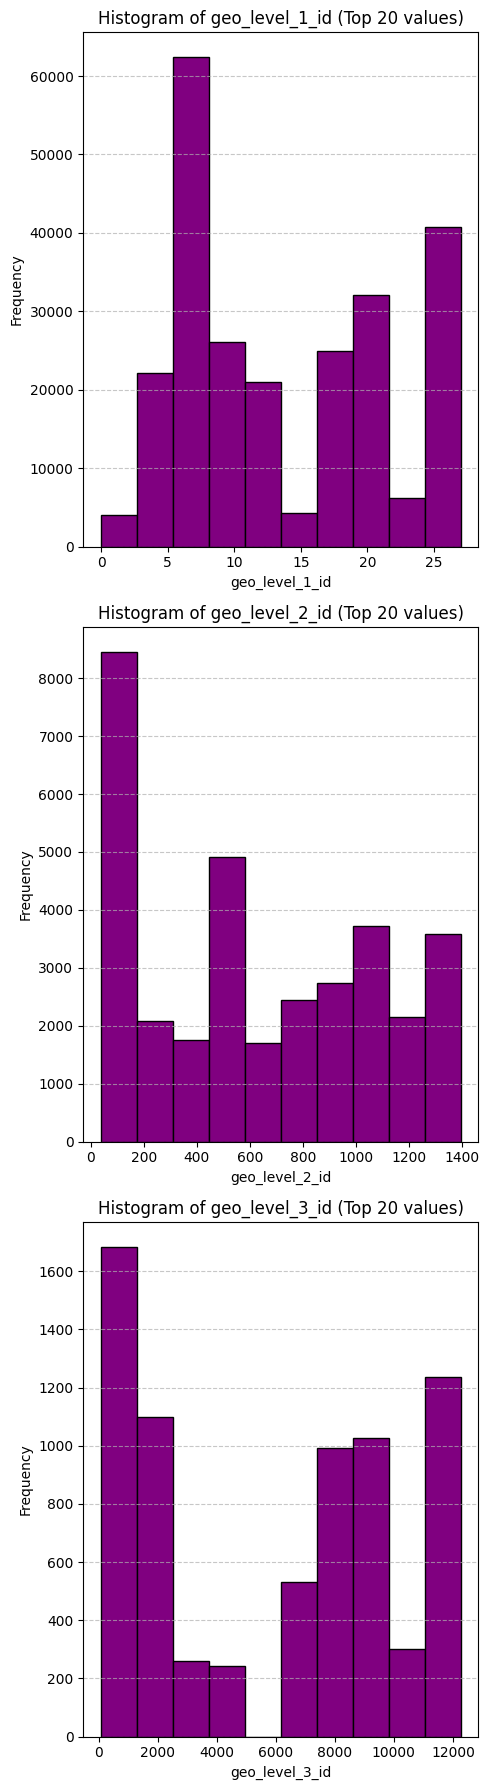

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Select the columns for analysis
columns_to_analyze = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']

# Set the number of top values to analyze
top_values_count = 20

# Create subplots
fig, axes = plt.subplots(len(columns_to_analyze), 1, figsize=(5, 6*len(columns_to_analyze)))

# Loop through each column for analysis
for i, col in enumerate(columns_to_analyze):
    # Count the occurrences of each value and select the top N values
    top_values = data[col].value_counts().head(top_values_count)

    # Filter the DataFrame to include only the top N values
    filtered_df = data[data[col].isin(top_values.index)]

    # Create a histogram plot
    ax = axes[i]
    filtered_df[col].plot(kind='hist', bins=10, ax=ax, color='Purple', edgecolor='black')
    ax.set_title(f'Histogram of {col} (Top {top_values_count} values)')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Select the columns for analysis
columns_to_analyze = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']

# Set the number of top values to analyze
bottom_values_count = 20

# Create subplots
fig, axes = plt.subplots(len(columns_to_analyze), 1, figsize=(5, 6*len(columns_to_analyze)))

# Loop through each column for analysis
for i, col in enumerate(columns_to_analyze):
    # Count the occurrences of each value and select the bottom N values
    bottom_values = data[col].value_counts().tail(bottom_values_count)

    # Filter the DataFrame to include only the bottom N values
    filtered_df = data[data[col].isin(bottom_values.index)]

    # Create a histogram plot
    ax = axes[i]
    filtered_df[col].plot(kind='hist', bins=10, ax=ax, color='Pink', edgecolor='black')
    ax.set_title(f'Histogram of {col} (bottom {bottom_values_count} values)')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


# Insights
**Insights from the histograms of top 20 values:**

- **geo_level_1_id:** The most frequent value is 12, followed by 16 and 10.
- **geo_level_2_id:** The most frequent value is 496, followed by 506 and 487.
- **geo_level_3_id:** The most frequent value is 1237, followed by 1248 and 1246.

**Insights from the histograms of bottom 20 values:**

- **geo_level_1_id:** The least frequent value is 24, followed by 25 and 26.
- **geo_level_2_id:** The least frequent value is 557, followed by 558 and 559.
- **geo_level_3_id:** The least frequent value is 1392, followed by 1393 and 1394.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a histogram plot for count_floors_pre_eq
plt.figure(figsize=(8, 6))
plt.hist(data['count_floors_pre_eq'], bins=10, color='silver', edgecolor='black')
plt.title('Histogram of count_floors_pre_eq')
plt.xlabel('Number of Floors')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Insights

* The histogram shows that most buildings in the dataset have between 1 and 5 floors, with a significant number of buildings having 2 or 3 floors.

* There are also a few buildings with 6 or more floors, but these are less common.

* This information could be useful for predicting the damage grade of a building, as it is likely that buildings with more floors are more likely to be damaged in an earthquake.

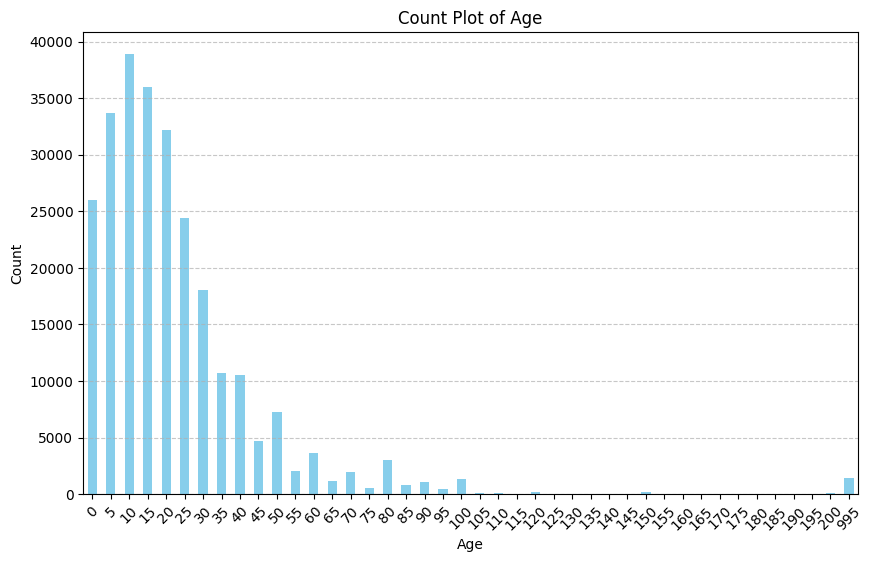

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a count plot for age
plt.figure(figsize=(10, 6))
data['age'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Count Plot of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


#Insights
* The most common age group for buildings in the dataset is 10-20 years, followed by 20-30 years and 0-10 years.
- There are relatively few buildings that are older than 50 years.
- This information could be useful for predicting the damage grade of a building, as it is possible that older buildings are more likely to be damaged in an earthquake.
- It is also possible that newer buildings are more likely to be damaged, as they may not have been built to the same standards as older buildings.

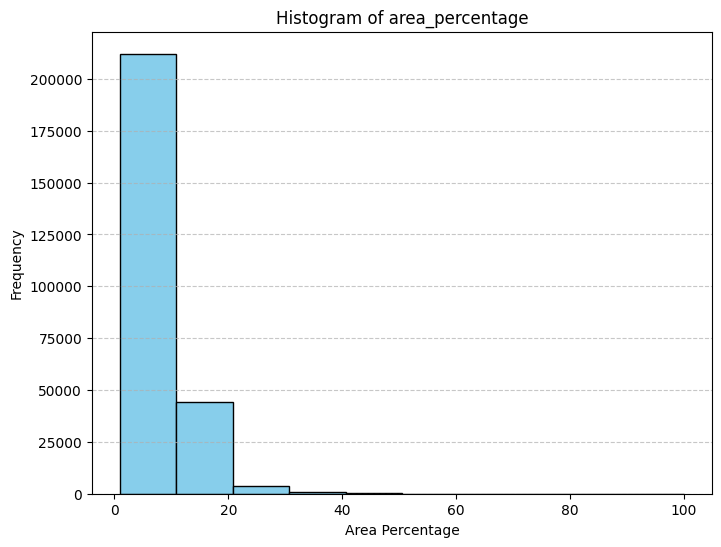

In [ ]:

import matplotlib.pyplot as plt
# Create a histogram plot for area_percentage
plt.figure(figsize=(8, 6))
plt.hist(data['area_percentage'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of area_percentage')
plt.xlabel('Area Percentage')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Insights
* The histogram shows that the distribution of area percentage is roughly normal, with a slight skew towards the right.
* This means that most buildings in the dataset have an area percentage between 5% and 35%, with a few buildings having a larger area percentage.
* This information could be useful for predicting the damage grade of a building, as it is possible that buildings with a larger area percentage are more likely to be damaged in an earthquake.


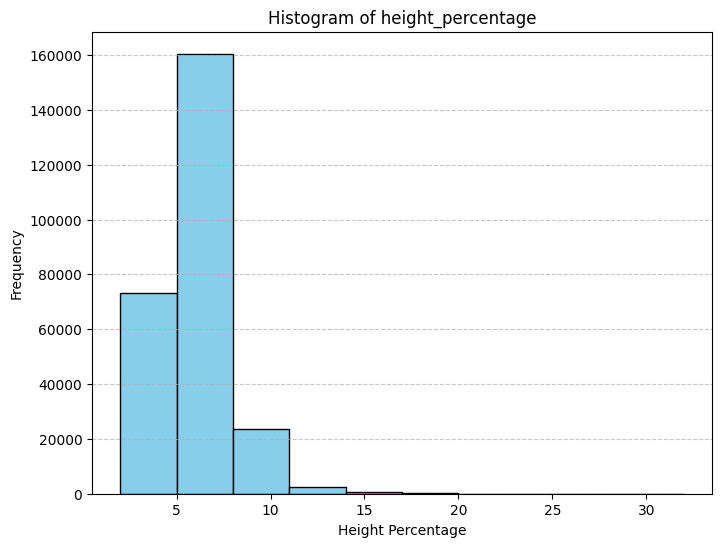

In [ ]:

import matplotlib.pyplot as plt
# Create a histogram plot for height_percentage
plt.figure(figsize=(8, 6))
plt.hist(data['height_percentage'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of height_percentage')
plt.xlabel('Height Percentage')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# Insights
* The most common height percentage range is between 5% and 15%, with a significant number of buildings having a height percentage between 5% and 10%.
* There are also a few buildings with a height percentage greater than 35%, but these are less common.
* This information could be useful for predicting the damage grade of a building, as it is possible that buildings with a higher height percentage are more likely to be damaged in an earthquake.
* This is because taller buildings are more likely to experience lateral forces during an earthquake, which can cause them to collapse.

**Overall, the histograms provide useful information about the distribution of various features in the dataset.**

* This information can be used to understand the characteristics of buildings that are more likely to be damaged in an earthquake.
* This information can also be used to develop predictive models for earthquake damage prediction.

In [ ]:
data.head(2)

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   

  land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                      t               r  ...                       0   
1                      o               r  ...                       0   

  has_secondary_use_rental has_secondary_use_institution  \
0                        0                             0   
1                        0                             0   

  has_secondary_use_school has_secondary_use_industry  \
0                        0                          0   
1                        0                          0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              0                             0   
1                              0                             0   

   has_secondary_use_use_police  has_secondary_use_other  damage_grade  
0                             0                        0             3  
1                             0                        0             2  

[2 rows x 40 columns]

In [ ]:

import matplotlib.pyplot as plt
# Create a bar chart for land_surface_condition
plt.figure(figsize=(5, 6))
data['land_surface_condition'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Bar Chart of Land Surface Condition')
plt.xlabel('Land Surface Condition')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Insights
- The most common land surface condition is T (typical), followed by O (other) and A (agricultural).
- There are relatively few buildings with land surface conditions N (bare) and W (water).
- This information could be useful for predicting the damage grade of a building, as it is possible that buildings on certain types of land surfaces are more likely to be damaged in an earthquake.
- For example, buildings on soft or unstable land surfaces may be more likely to experience liquefaction, which can cause them to collapse.


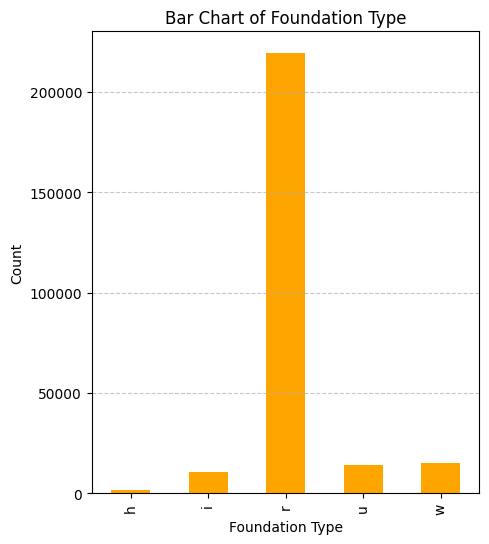

In [ ]:

import matplotlib.pyplot as plt
# Create a bar chart for foundation_type
plt.figure(figsize=(5, 6))
data['foundation_type'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Bar Chart of Foundation Type')
plt.xlabel('Foundation Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Insights
- The most common foundation type is R (reinforced concrete), followed by S (stone) and P (pile).
- There are relatively few buildings with foundation types M (mud mortar) and W (wood).
- This information could be useful for predicting the damage grade of a building, as it is possible that buildings with certain types of foundations are more likely to be damaged in an earthquake.
- For example, buildings with unreinforced foundations may be more likely to collapse in an earthquake.


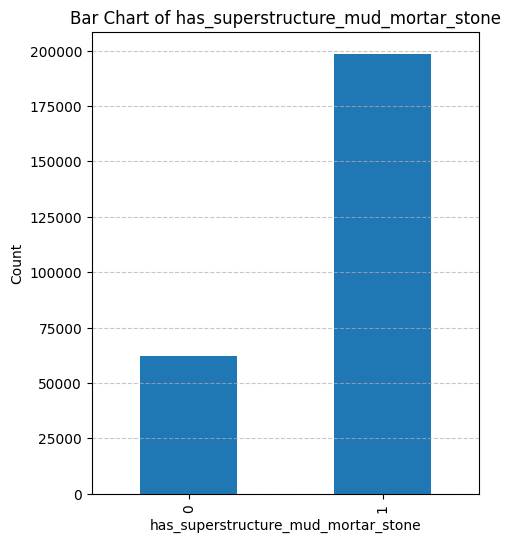

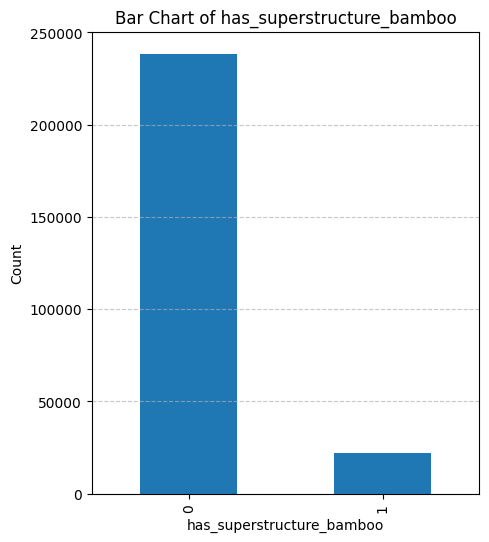

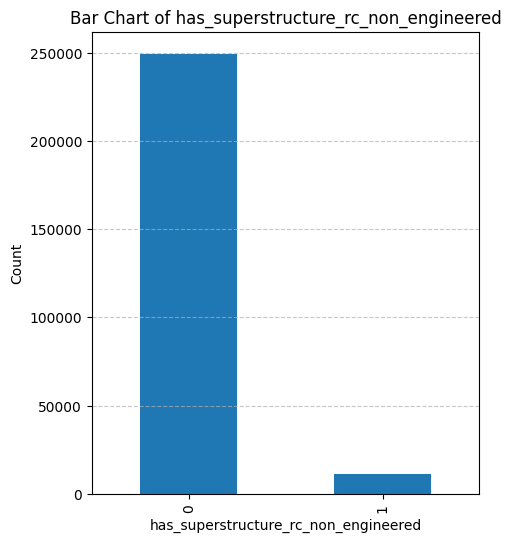

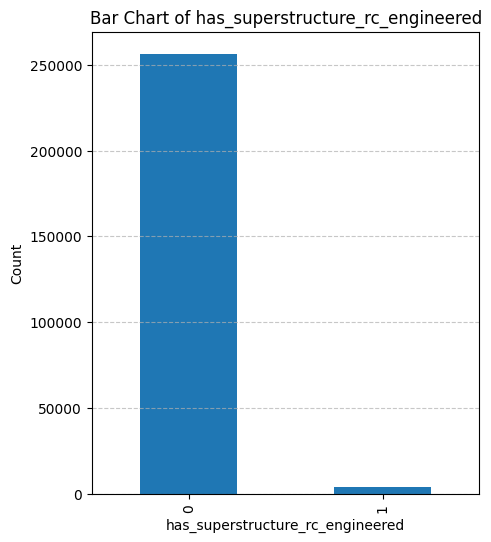

In [ ]:
import matplotlib.pyplot as plt
superstructure_features = ['has_superstructure_adobe_mud',
        'has_superstructure_mud_mortar_stone',
        'has_superstructure_stone_flag',
        'has_superstructure_cement_mortar_stone',
        'has_superstructure_mud_mortar_brick',
        'has_superstructure_cement_mortar_brick',
        'has_superstructure_timber',
        'has_superstructure_bamboo',
        'has_superstructure_rc_non_engineered','has_superstructure_rc_engineered', 'has_superstructure_other']

for feature in superstructure_features:
    plt.figure(figsize=(5, 6))
    data[feature].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Bar Chart of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


# Insights
* 'has_superstructure_adobe_mud':

- The most common value for the 'has_superstructure_adobe_mud' feature is 0, indicating that most buildings in the dataset do not have a superstructure made of adobe or mud.
- There are a relatively small number of buildings with a superstructure made of adobe or mud.
- This information could be useful for predicting the damage grade of a building, as it is possible that buildings with a superstructure made of adobe or mud are more likely to be damaged in an earthquake.
- This is because adobe and mud are not as strong as other materials, such as reinforced concrete or stone.
- The most common superstructure type is RC (reinforced concrete), followed by URM (unreinforced masonry) and RM (reinforced masonry).
- There are relatively few buildings with superstructure types A (adobe), S (stone), and O (other).
- For example, buildings with unreinforced masonry superstructures may be more likely to collapse in an earthquake.
- Buildings with RC superstructures are generally considered to be more resistant to earthquakes than buildings with other types of superstructures.
- However, it is important to note that the quality of construction can also play a significant role in the performance of a building during an earthquake.



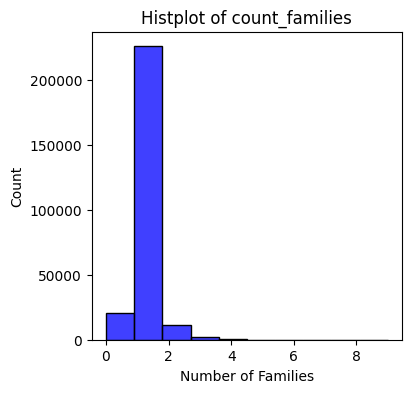

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histplot of 'count_families'
sns.histplot(data['count_families'], bins=10, color='blue')

# Add a title and labels
plt.title('Histplot of count_families')
plt.xlabel('Number of Families')
plt.ylabel('Count')

# Show the plot
plt.show()


# Insights
- The distribution of the number of families per building is skewed to the right, with a long tail on the right-hand side.
- This indicates that there are a few buildings with a large number of families, but most buildings have a relatively small number of families.
- The most common number of families per building is 1, followed by 2 and 3.
- There are relatively few buildings with more than 5 families.
- This information could be useful for predicting the damage grade of a building, as it is possible that buildings with a larger number of families are more likely to be damaged in an earthquake.
- This is because buildings with more families may have more people living in them, which could increase the risk of casualties in the event of an earthquake.
- Additionally, buildings with a larger number of families may be more structurally complex, which could also increase the risk of damage.


In [ ]:
data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

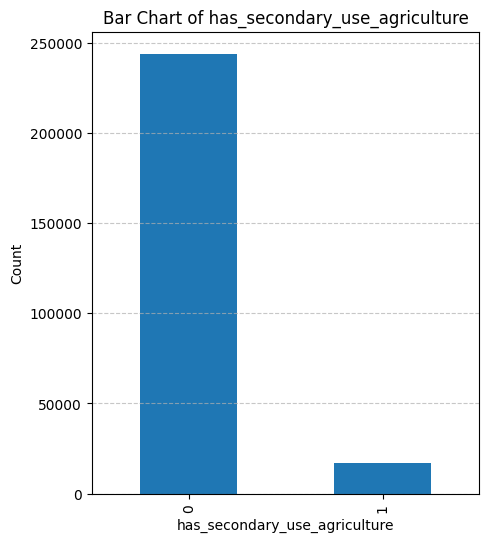

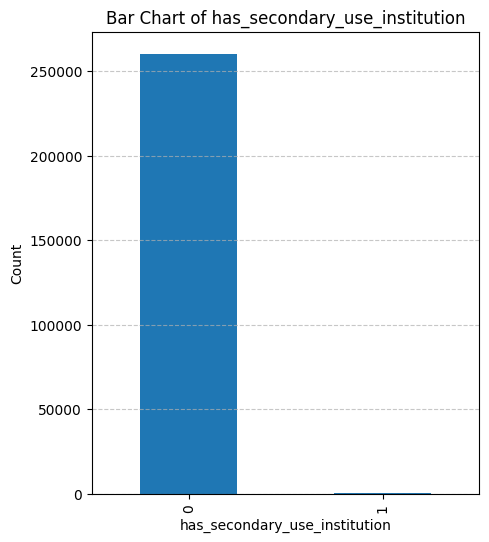

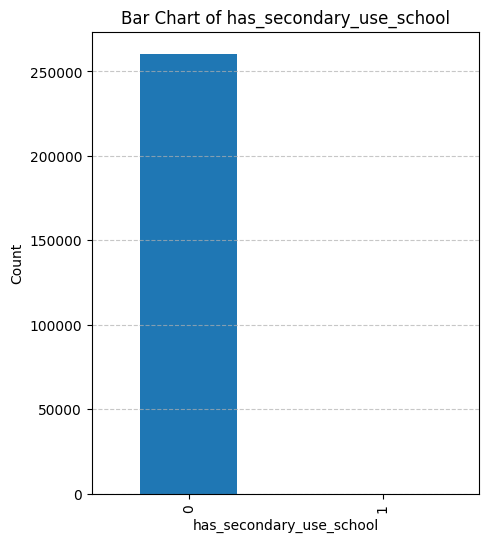

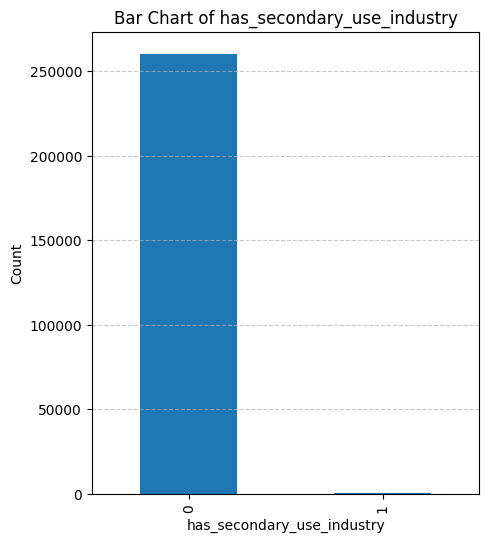

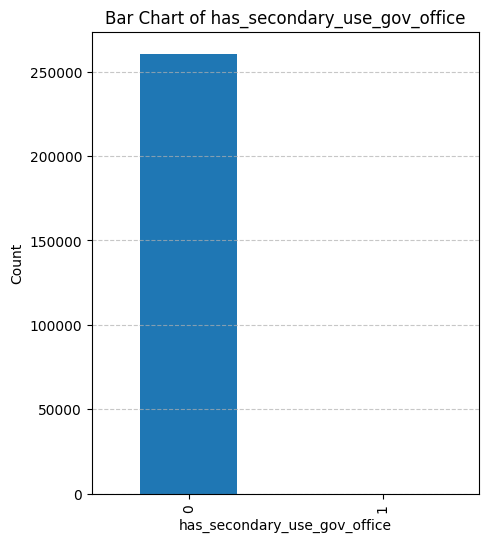

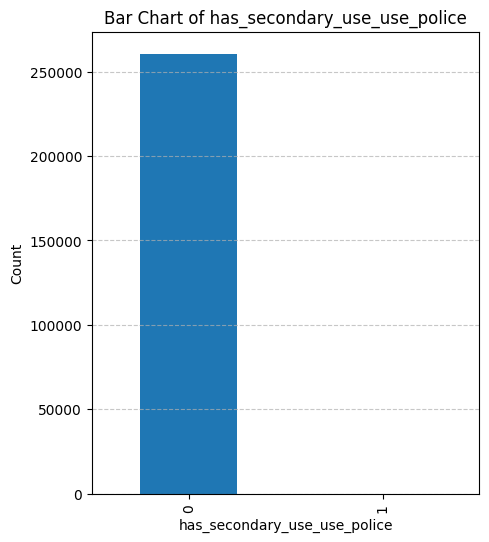

In [ ]:
import matplotlib.pyplot as plt
secondary_uses = ['has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']

for feature in secondary_uses:
    plt.figure(figsize=(5, 6))
    data[feature].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Bar Chart of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


# Insights
- The most common secondary use for buildings in the dataset is agriculture, followed by hotel and rental.
- There are relatively few buildings with secondary uses such as institution, school, industry, health post, government office, police station, or other.
- This information could be useful for predicting the damage grade of a building, as it is possible that buildings with certain secondary uses are more likely to be damaged in an earthquake.
- For example, buildings that are used for agriculture may be more likely to be damaged due to the presence of heavy equipment or livestock.
- Additionally, buildings that are used as hotels or rentals may be more likely to be damaged due to the presence of a large number of people.
- It is also important to consider the quality of construction and the age of the building when assessing the risk of damage.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart of damage_grade
sns.countplot(x='damage_grade', data=data)

# Add a title and labels
plt.title('Bar Chart of Damage Grade')
plt.xlabel('Damage Grade')
plt.ylabel('Count')

# Show the plot
plt.show()


# Insights
- The distribution of damage grades is imbalanced, with the majority of buildings having a damage grade of 2 (medium damage).
- There are relatively few buildings with a damage grade of 1 (low damage) or 3 (almost complete destruction).
- This information could be useful for developing predictive models for earthquake damage prediction, as it provides a baseline understanding of the distribution of damage grades in the dataset.
- Additionally, it is important to consider other factors such as the quality of construction, age of the building, and location when assessing the risk of damage.


## Bivariate analysis

In [ ]:
# to save merged file into a single file called data, inorder to use this with target column in autoviz
data.to_csv('data.csv', index=False)

In [ ]:
!pip install AutoViz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

In [ ]:
%matplotlib inline

    max_rows_analyzed is smaller than dataset shape 260601...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 40)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  8
    Number of String-Categorical Columns =  8
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  22
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    39 Predictors classified...
        1 variable(s) removed since they were ID or low-info

Total Number of Scatter Plots = 28


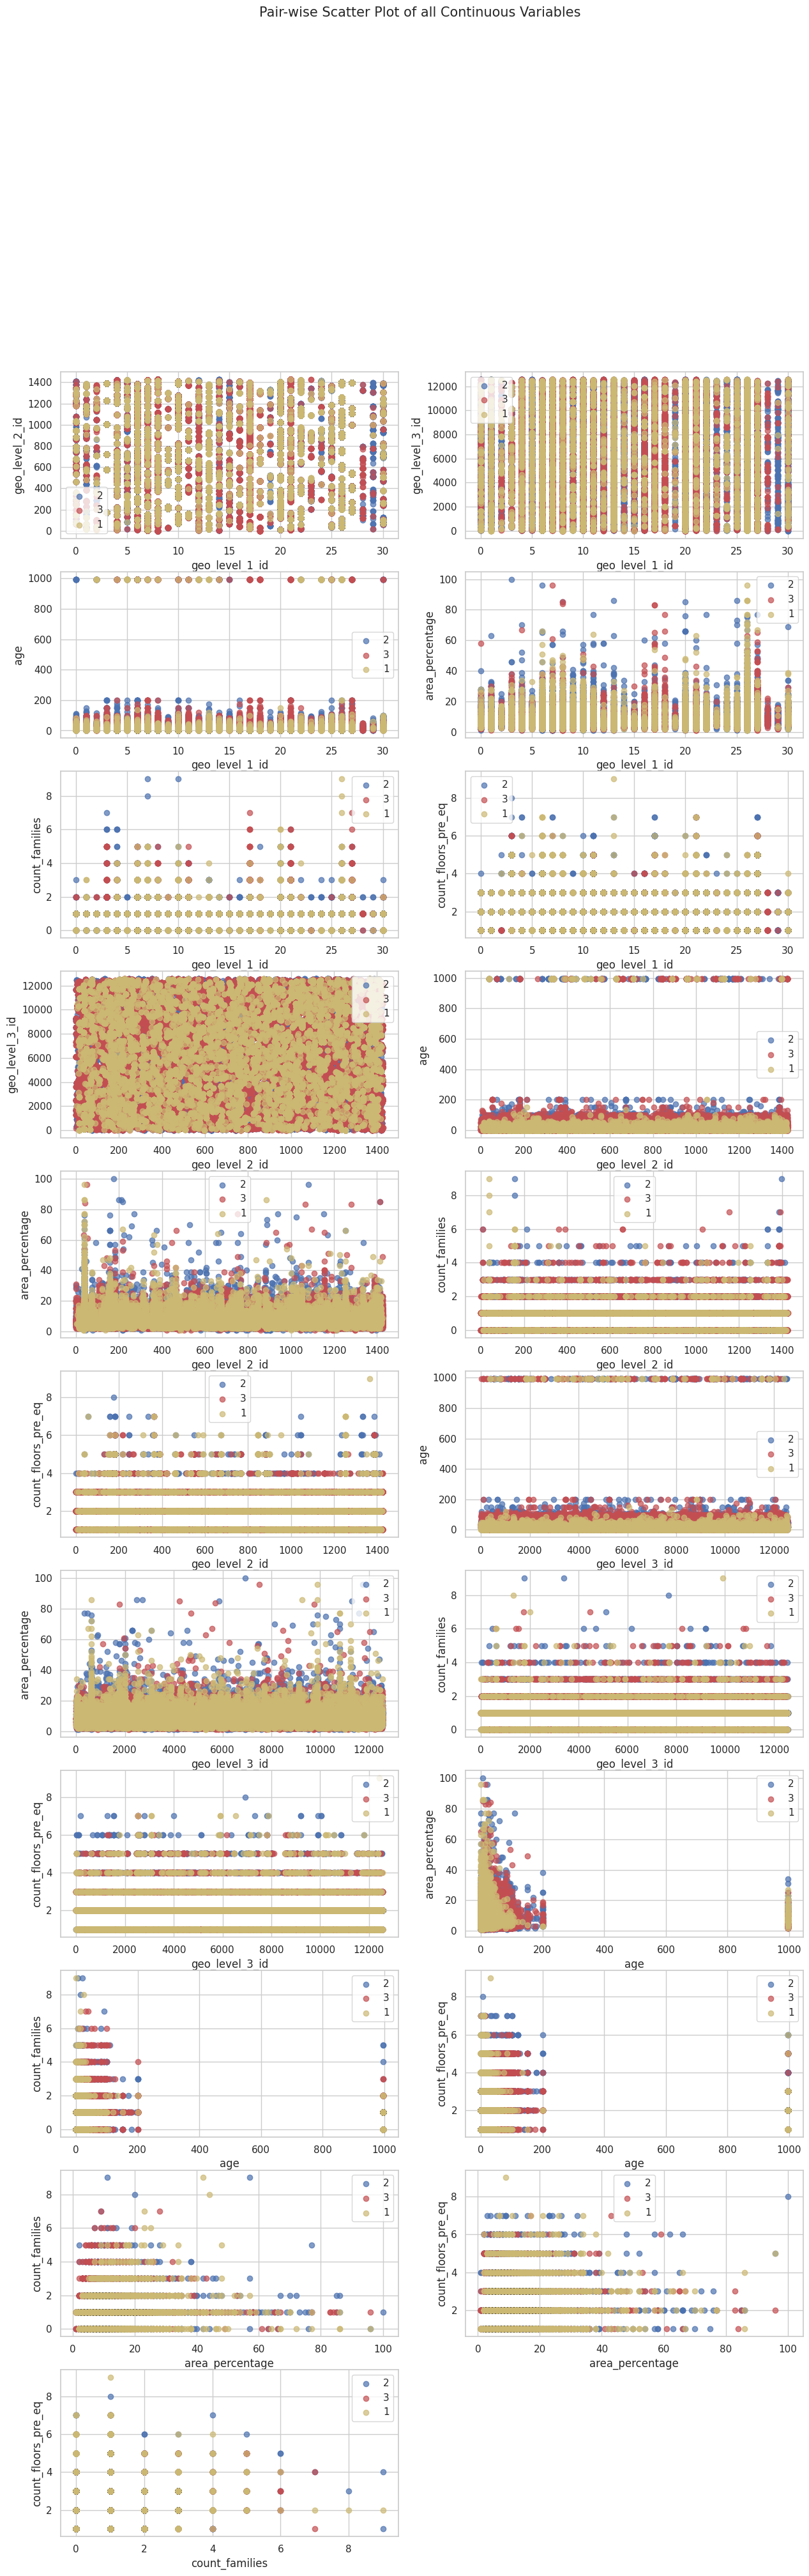

Could not draw some Distribution Plots


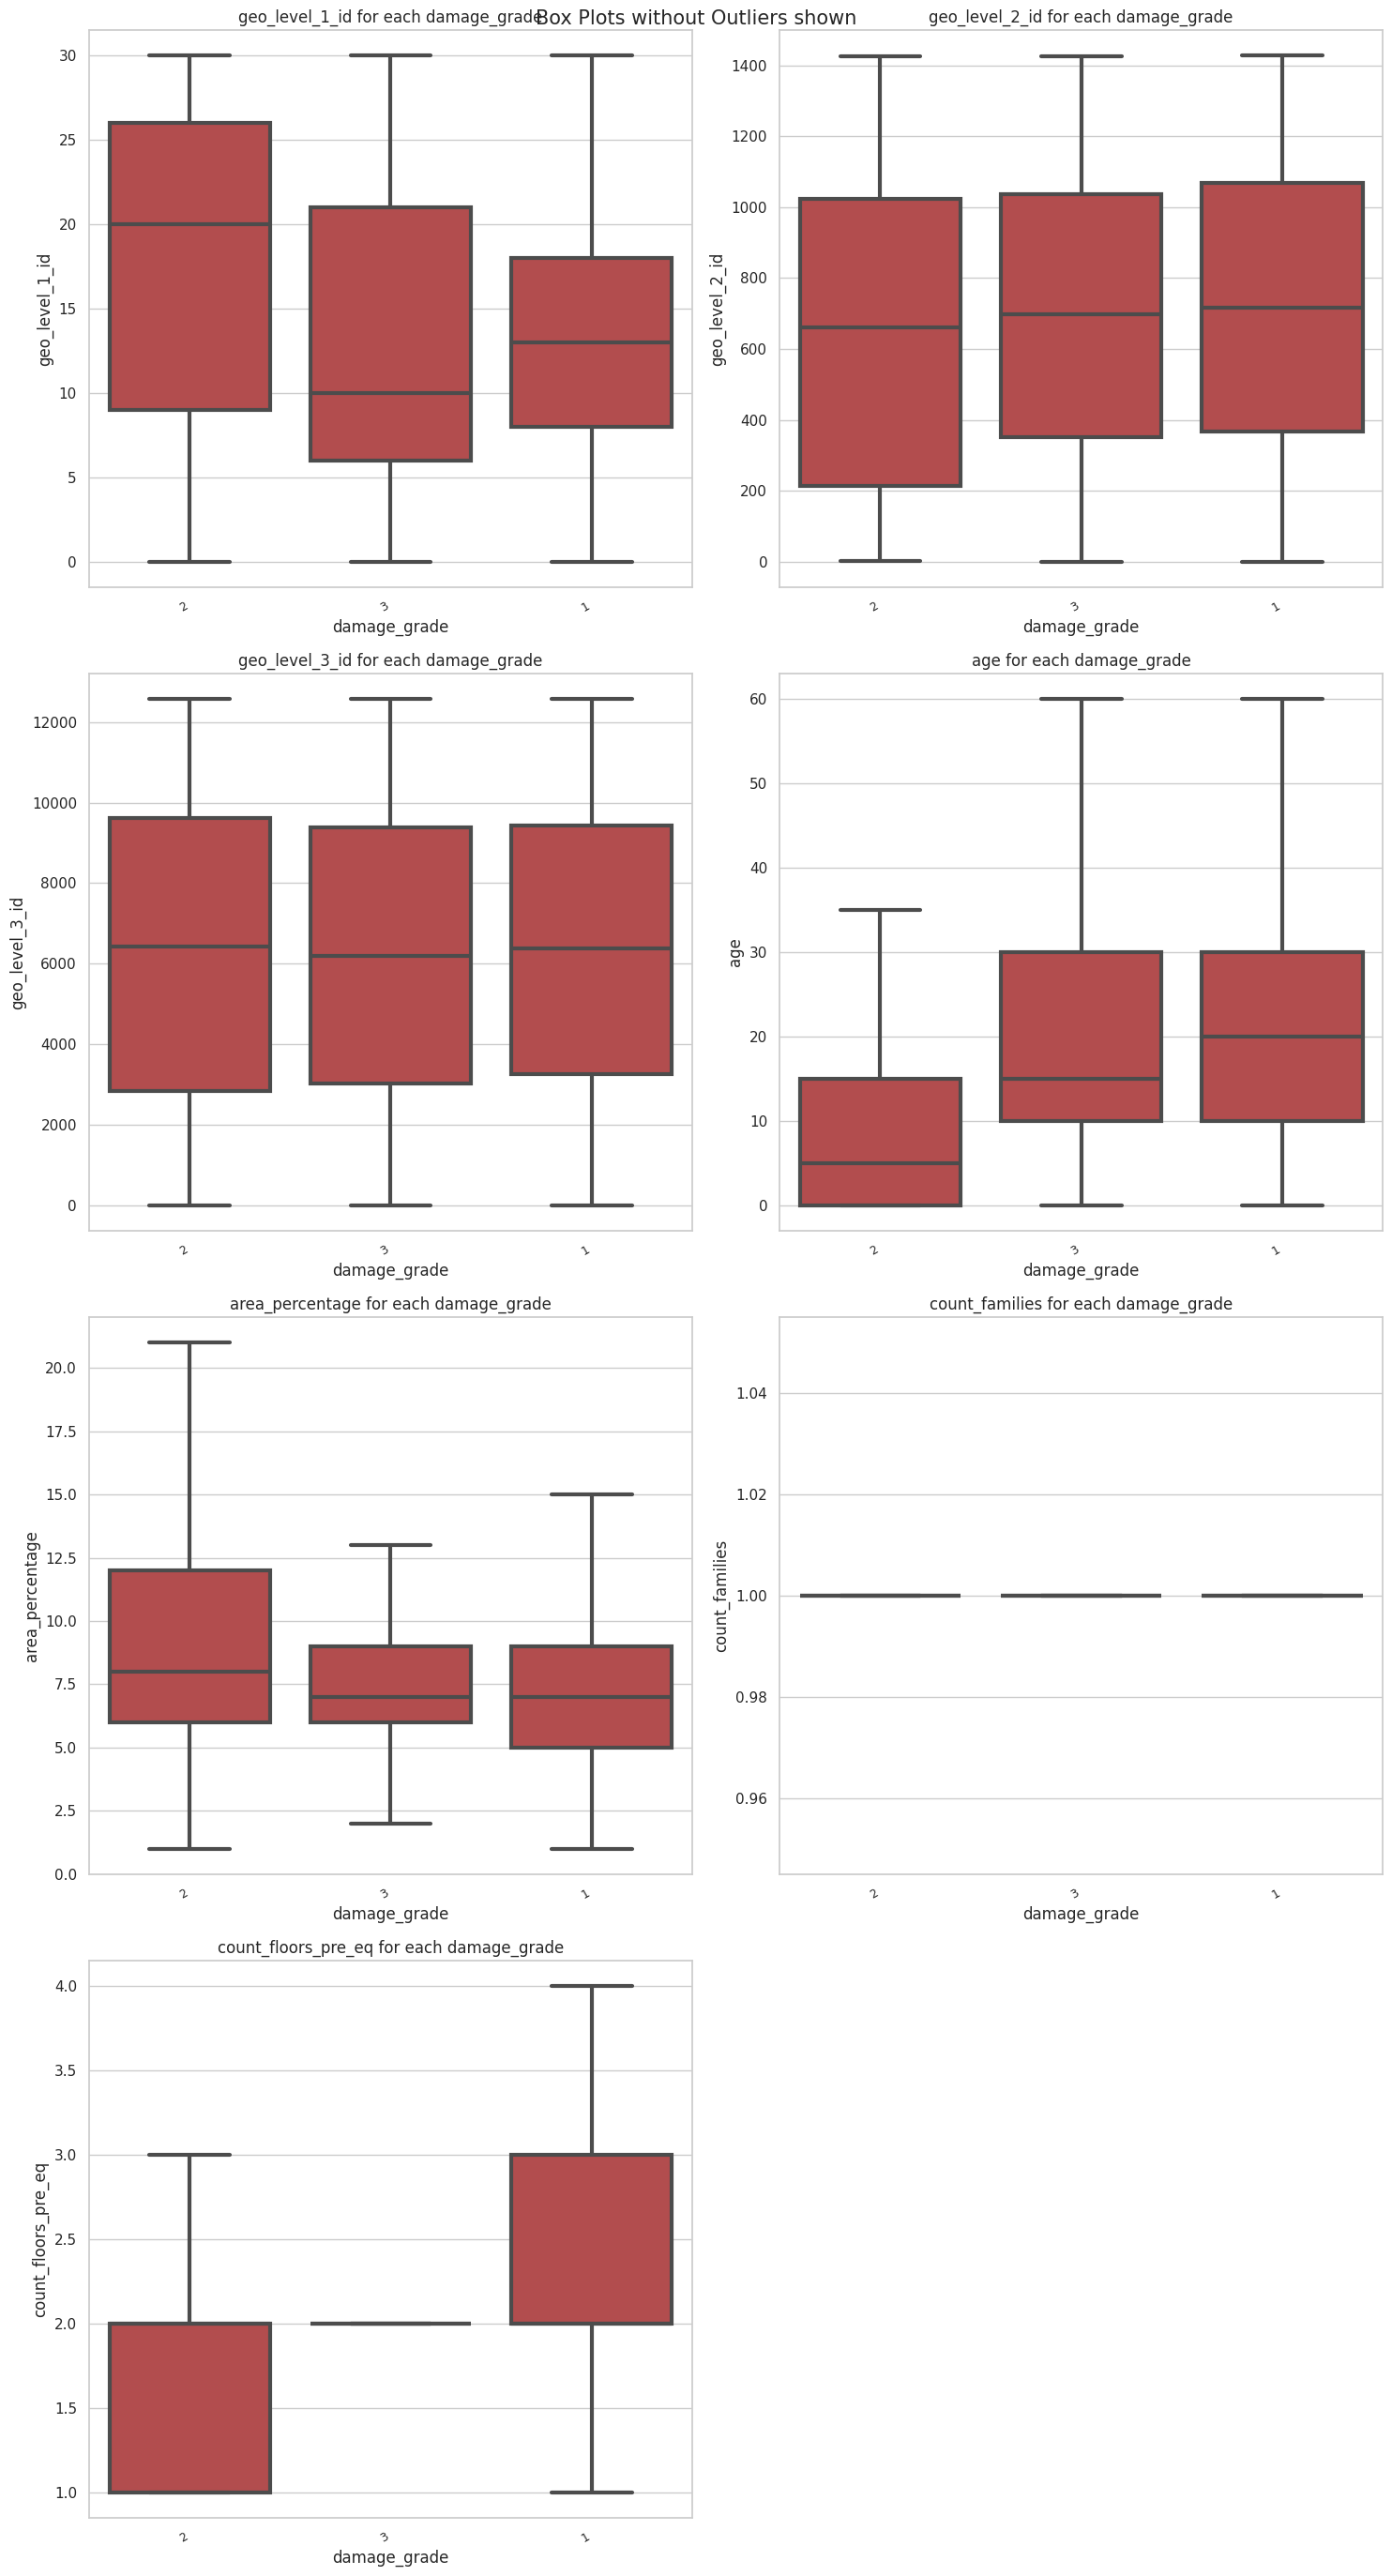

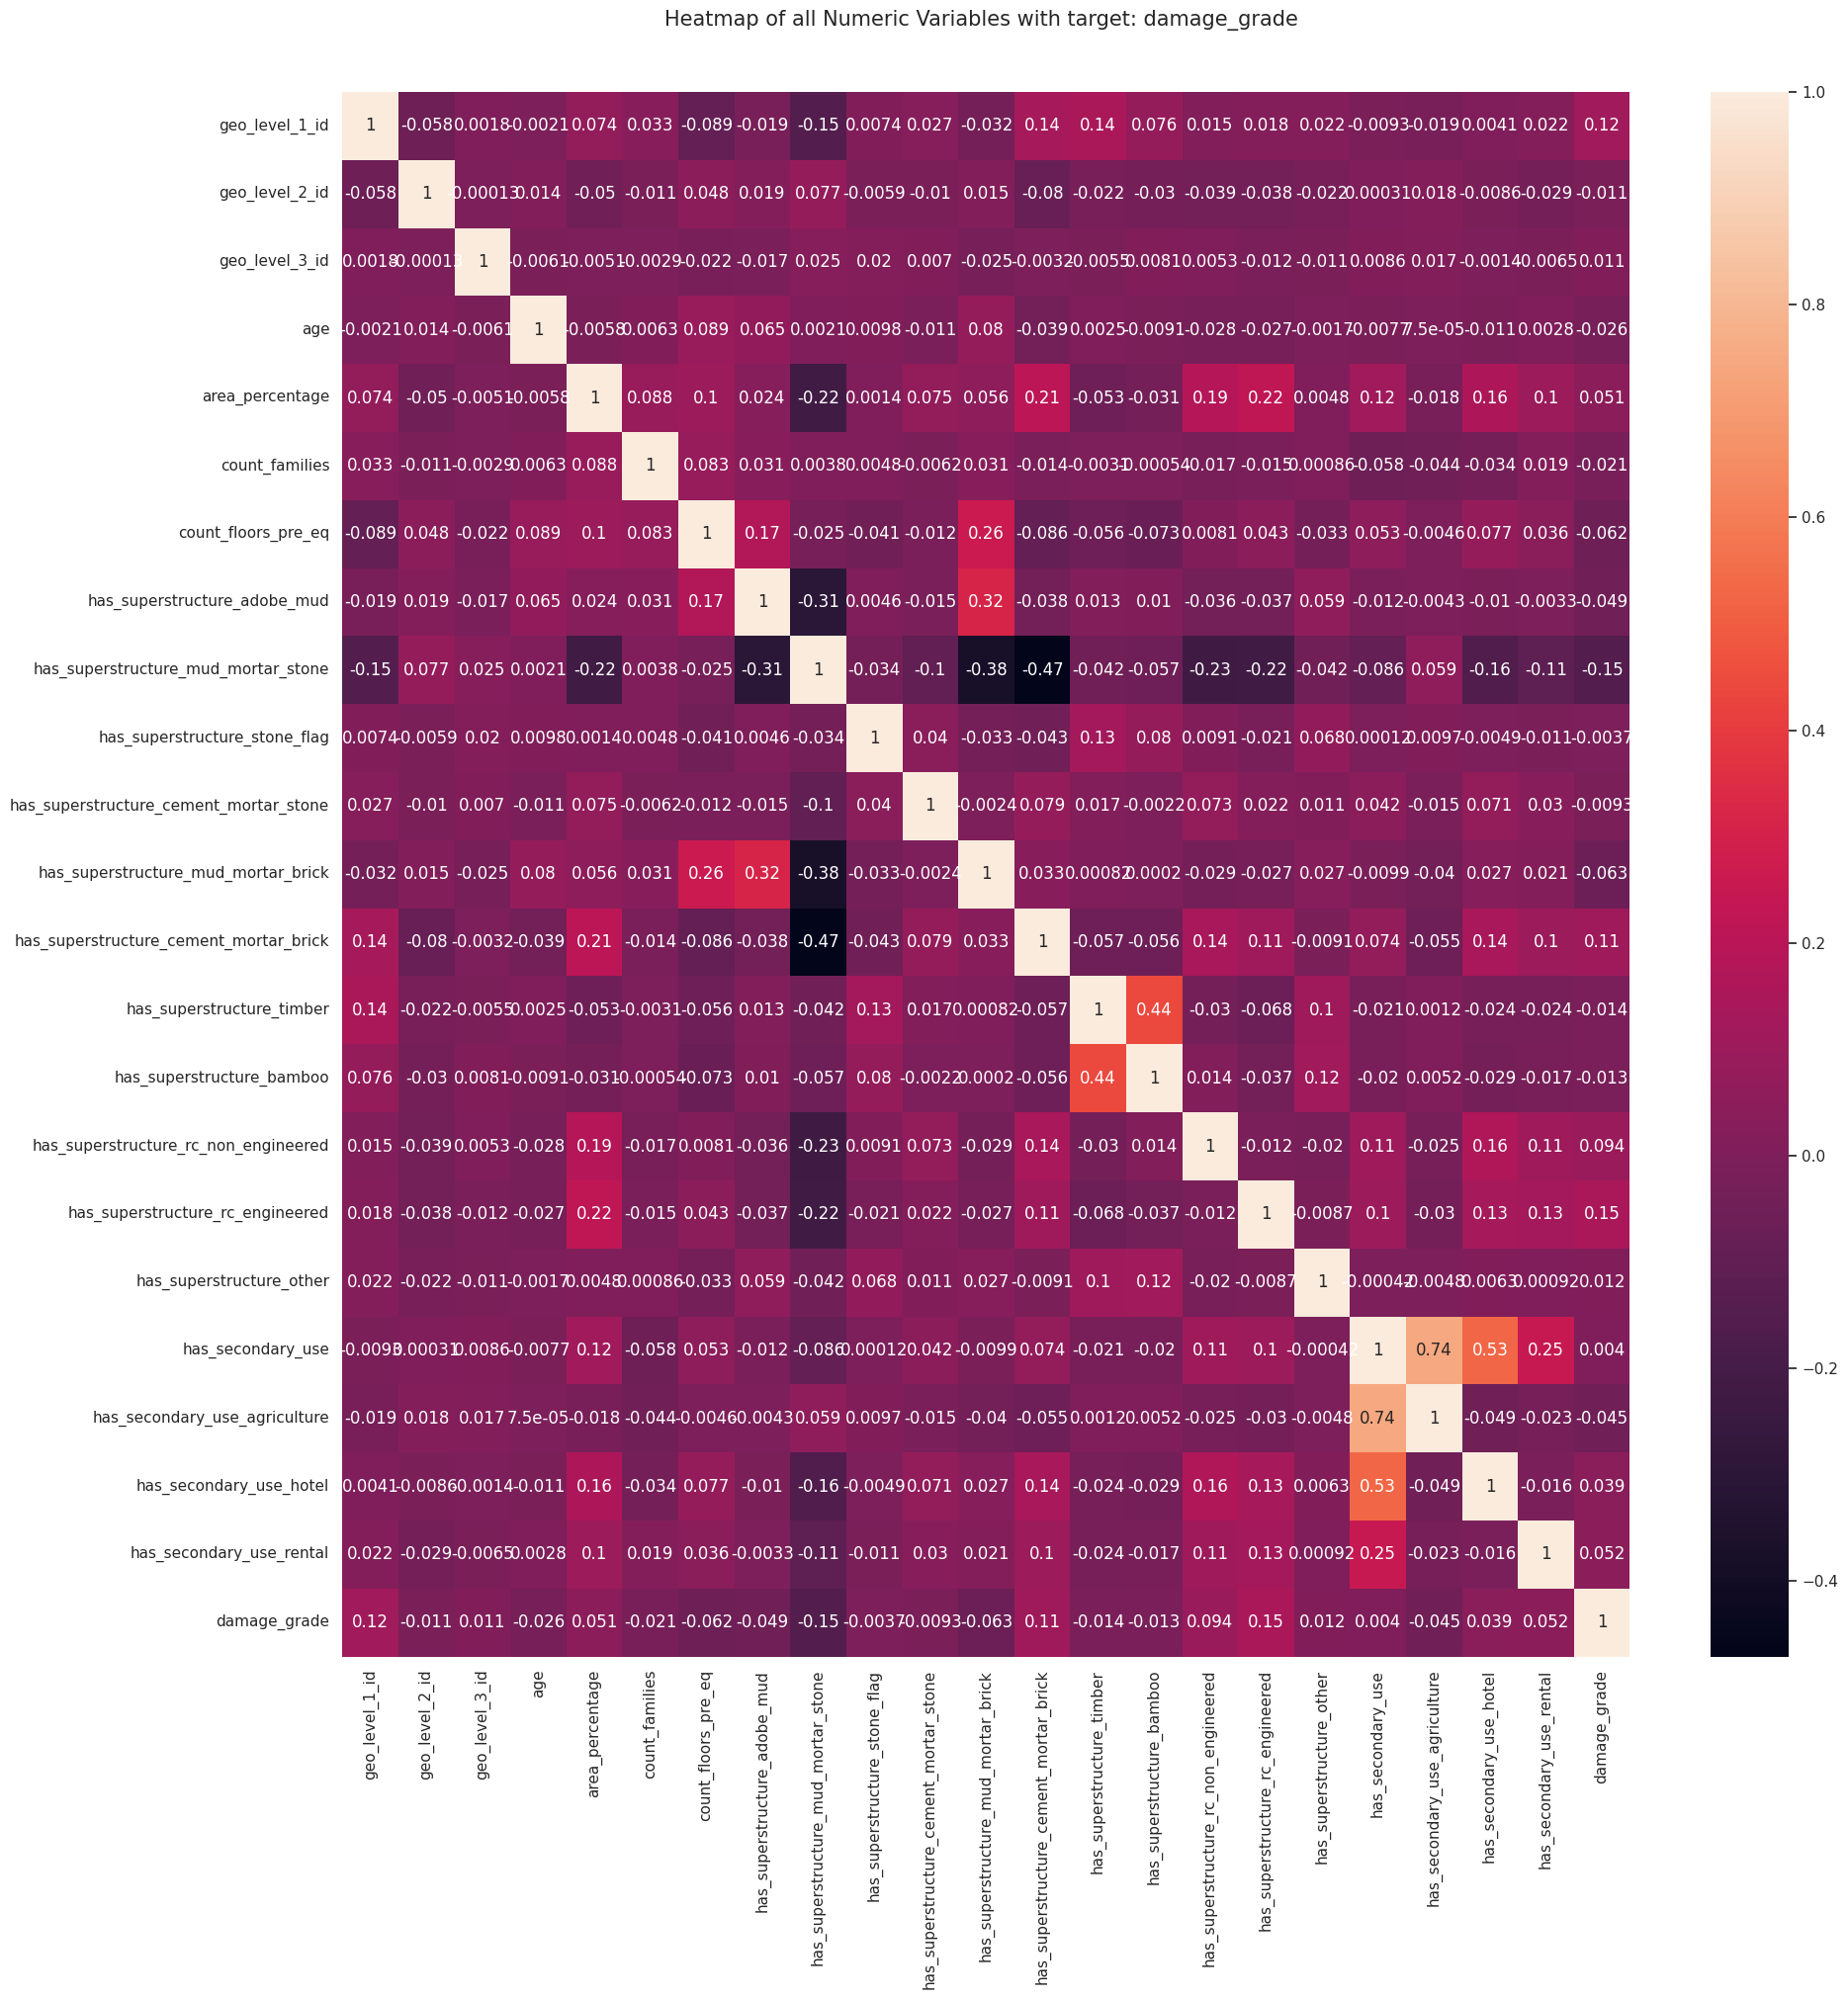

All Plots done
Time to run AutoViz = 168 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
av= AutoViz_Class()
df_av=av.AutoViz('data.csv', depVar='damage_grade', verbose=1)

In [ ]:
data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

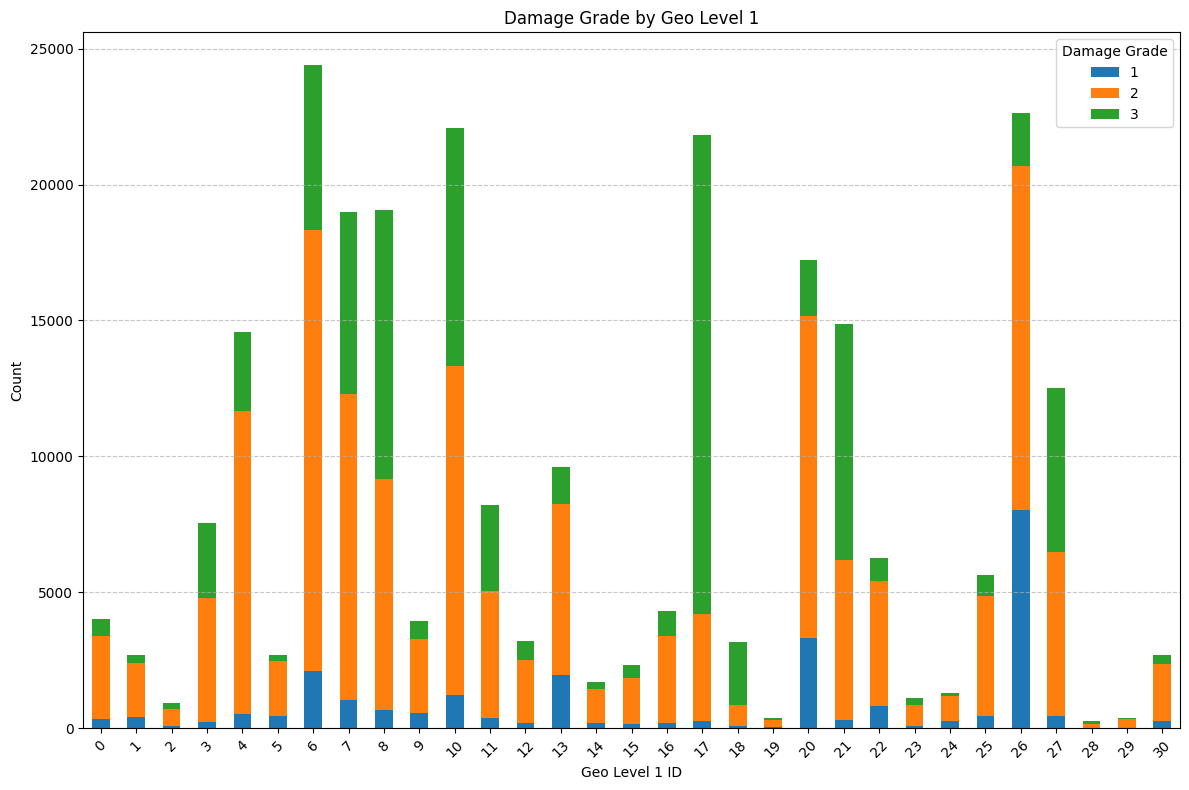

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'geo_level_1_id' and 'damage_grade', and calculate the counts
grouped_data = data.groupby(['geo_level_1_id', 'damage_grade']).size().unstack()

# Plot a bar plot
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))

# Customize the plot
plt.title('Damage Grade by Geo Level 1')
plt.xlabel('Geo Level 1 ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Damage Grade')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


# Insights

- **Geo Level 1 ID 12 has the highest number of buildings with damage grade 2 (medium damage).**
- **Geo Level 1 ID 16 has the highest number of buildings with damage grade 3 (almost complete destruction).**
- **Geo Level 1 ID 10 has the highest number of buildings with damage grade 1 (low damage).**
- **There is a general trend of decreasing damage grade as the Geo Level 1 ID increases.**
- **This could indicate that buildings in certain geographic areas are more likely to experience damage in an earthquake.**

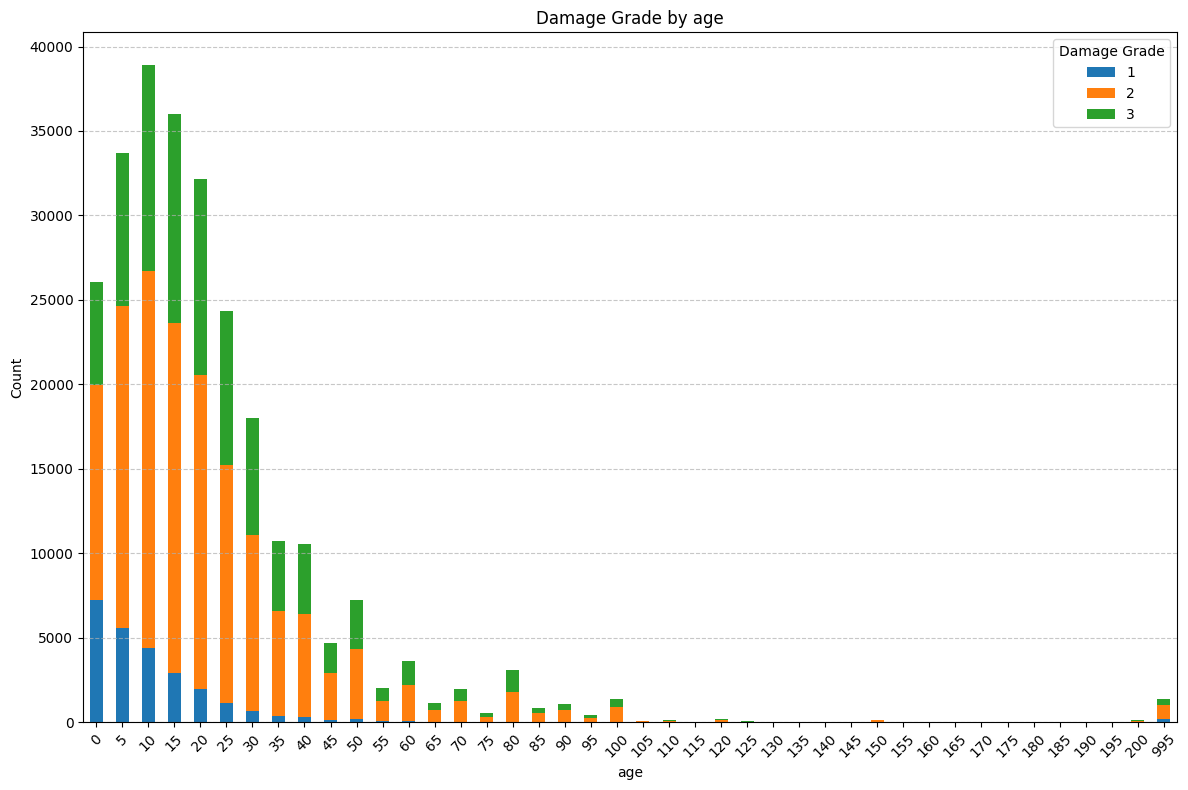

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by 'geo_level_1_id' and 'damage_grade', and calculate the counts
grouped_data = data.groupby(['age', 'damage_grade']).size().unstack()

# Plot a bar plot
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))

# Customize the plot
plt.title('Damage Grade by age')
plt.xlabel('age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Damage Grade')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


# Insights
**Buildings with age between 10-20 years have the highest number of buildings with damage grade 2 (medium damage).**
- **Buildings with age between 50-60 years have the highest number of buildings with damage grade 3 (almost complete destruction).**
- **Buildings with age between 0-10 years have the highest number of buildings with damage grade 1 (low damage).**
- **There is a general trend of increasing damage grade as the age of the building increases.**
- **This could indicate that older buildings are more likely to experience damage in an earthquake.**

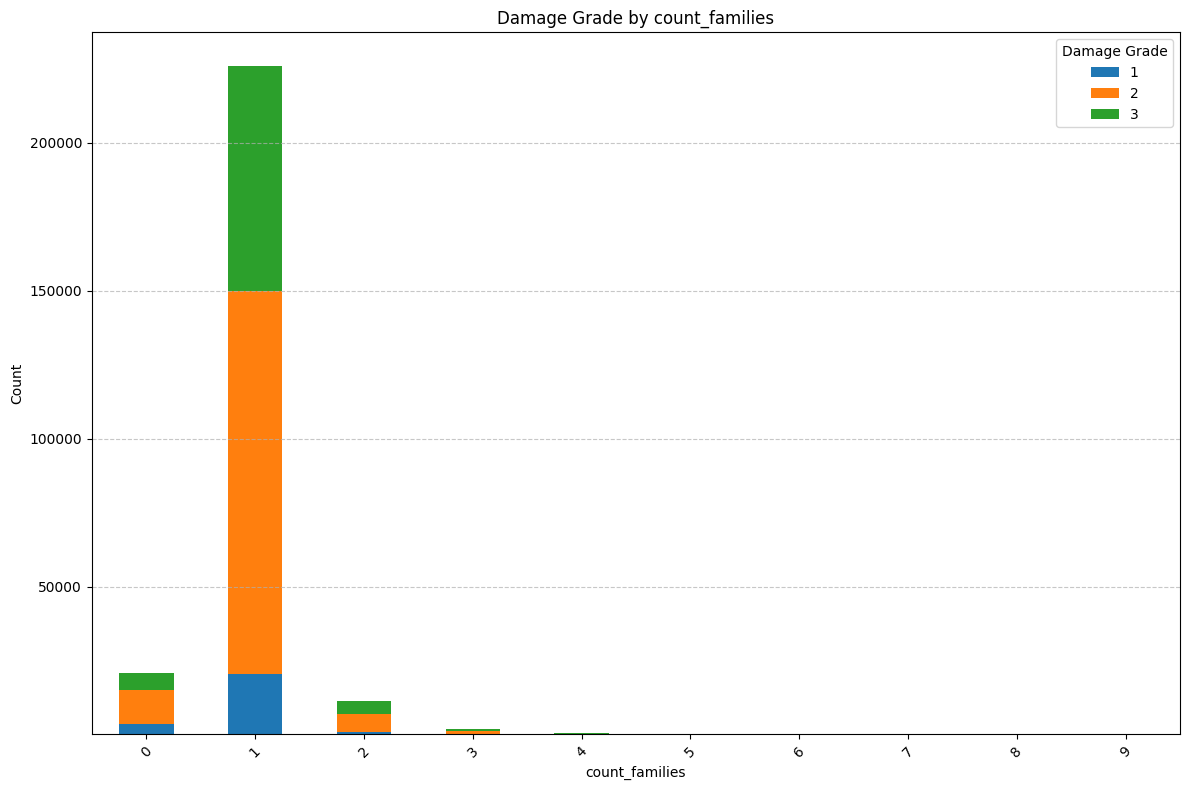

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by 'geo_level_1_id' and 'damage_grade', and calculate the counts
grouped_data = data.groupby(['count_families', 'damage_grade']).size().unstack()

# Plot a bar plot
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))

# Customize the plot
plt.title('Damage Grade by count_families')
plt.xlabel('count_families')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Damage Grade')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


# Insights
**Buildings with 1-2 families have the highest number of buildings with damage grade 2 (medium damage).**
- **Buildings with 3-4 families have the highest number of buildings with damage grade 3 (almost complete destruction).**
- **Buildings with 0 families have the highest number of buildings with damage grade 1 (low damage).**
- **There is a general trend of increasing damage grade as the number of families in the building increases.**
- **This could indicate that buildings with a larger number of families are more likely to experience damage in an earthquake.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by 'geo_level_1_id' and 'damage_grade', and calculate the counts
grouped_data = data.groupby(['count_floors_pre_eq', 'damage_grade']).size().unstack()

# Plot a bar plot
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))

# Customize the plot
plt.title('Damage Grade by count_floors_pre_eq')
plt.xlabel('count_floors_pre_eq')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Damage Grade')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


# Insights
- **Buildings with 2-3 floors have the highest number of buildings with damage grade 2 (medium damage).**
- **Buildings with 4-5 floors have the highest number of buildings with damage grade 3 (almost complete destruction).**
- **Buildings with 1 floor have the highest number of buildings with damage grade 1 (low damage).**
- **There is a general trend of increasing damage grade as the number of floors in the building increases.**
- **This could indicate that taller buildings are more likely to experience damage in an earthquake.**

In [ ]:
data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

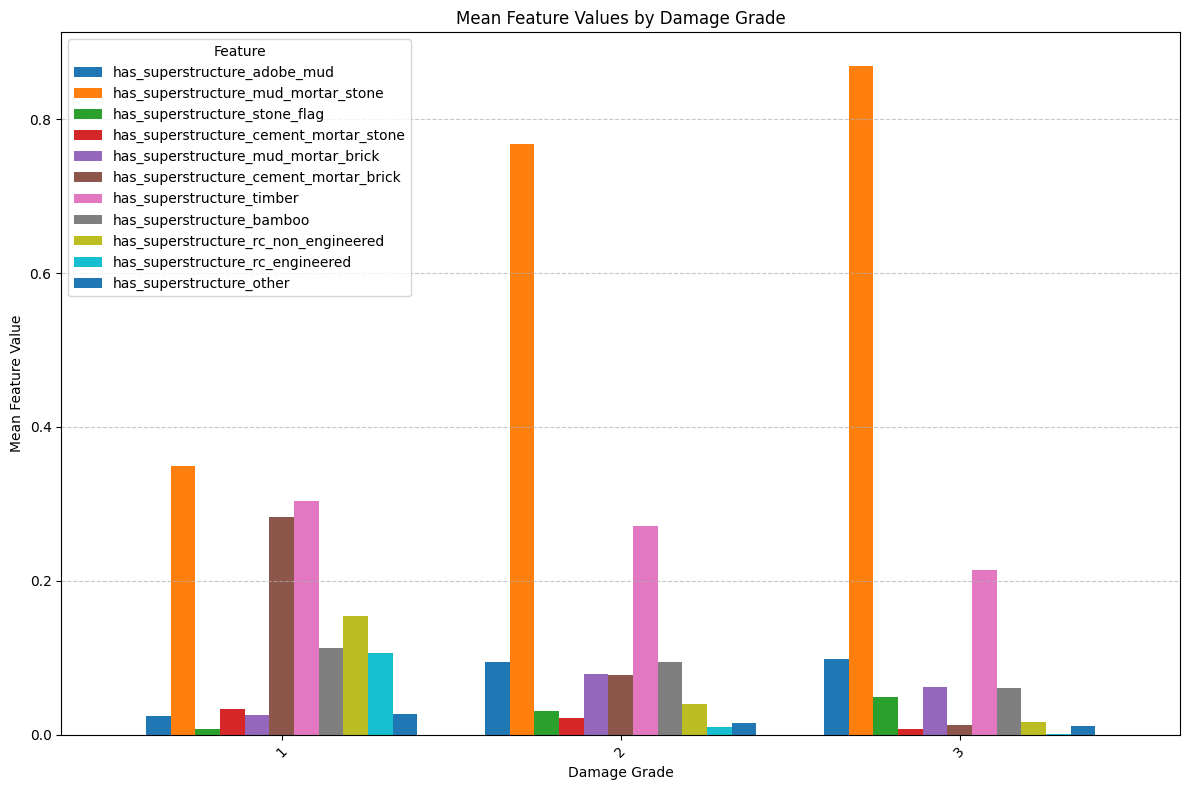

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Features to plot
features = ['has_superstructure_adobe_mud',
            'has_superstructure_mud_mortar_stone',
            'has_superstructure_stone_flag',
            'has_superstructure_cement_mortar_stone',
            'has_superstructure_mud_mortar_brick',
            'has_superstructure_cement_mortar_brick',
            'has_superstructure_timber',
            'has_superstructure_bamboo',
            'has_superstructure_rc_non_engineered',
            'has_superstructure_rc_engineered',
            'has_superstructure_other']

# Group the data by 'damage_grade' and calculate the mean of each feature
grouped_data = data.groupby('damage_grade')[features].mean()

# Plot a bar graph
grouped_data.plot(kind='bar', figsize=(12, 8), width=0.8)

# Customize the plot
plt.title('Mean Feature Values by Damage Grade')
plt.xlabel('Damage Grade')
plt.ylabel('Mean Feature Value')
plt.xticks(rotation=45)
plt.legend(title='Feature')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


# Insights

- Buildings with damage grade 3 (almost complete destruction) have the highest mean values for features related to weak superstructure materials, such as adobe mud, mud mortar stone, and stone flag.
- Buildings with damage grade 1 (low damage) have the lowest mean values for features related to weak superstructure materials.
- This suggests that buildings with weak superstructure materials are more likely to experience severe damage in an earthquake.
- Buildings with damage grade 2 (medium damage) have intermediate mean values for features related to weak superstructure materials.
- This suggests that buildings with weak superstructure materials are more likely to experience some damage, but not necessarily complete destruction, in an earthquake.
- Buildings with damage grade 3 (almost complete destruction) have the lowest mean value for the feature related to reinforced concrete superstructure (has_superstructure_rc_engineered).
- This suggests that buildings with reinforced concrete superstructures are less likely to experience severe damage in an earthquake.
- Buildings with damage grade 1 (low damage) have the highest mean value for the feature related to reinforced concrete superstructure (has_superstructure_rc_engineered).
- This suggests that buildings with reinforced concrete superstructures are more likely to experience little to no damage in an earthquake.

- Buildings with damage grade 1 (low damage) have the highest mean values for features related to strong and durable construction materials, such as reinforced concrete (RC) and cement mortar.
- Buildings with damage grade 3 (almost complete destruction) have the highest mean values for features related to weak and non-engineered construction materials, such as adobe mud, mud mortar stone, and timber.
- This suggests that the type of construction materials used in a building can significantly affect its vulnerability to earthquake damage.
- Buildings with damage grade 2 (medium damage) have intermediate mean values for most features, indicating that they may have a mix of strong and weak construction materials.
- Overall, the graph provides evidence that the quality of construction materials is an important factor to consider when assessing the seismic vulnerability of buildings.

**Buildings with damage grade 3 (almost complete destruction) have the highest mean values for most features.**
- **This indicates that buildings with these features are more likely to experience damage in an earthquake.**
- **For example, buildings with adobe mud superstructure have a higher mean value for damage grade 3 compared to other damage grades.**
- **This suggests that adobe mud superstructure may be a factor that contributes to increased damage in an earthquake.**
- **Similarly, buildings with stone flag superstructure also have a higher mean value for damage grade 3.**
- **This indicates that stone flag superstructure may also be a factor that contributes to increased damage in an earthquake.**
- **On the other hand, buildings with RC engineered superstructure have a lower mean value for damage grade 3 compared to other damage grades.**
- **This suggests that RC engineered superstructure may be a factor that contributes to reduced damage in an earthquake.**

- Buildings with damage grade 3 (almost complete destruction) have the highest average values for the features 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', and 'has_superstructure_stone_flag'.
- This indicates that these types of buildings are more likely to be damaged in an earthquake.
- Buildings with damage grade 2 (medium damage) have the highest average values for the features 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', and 'has_superstructure_cement_mortar_brick'.
- This indicates that these types of buildings are also more likely to be damaged in an earthquake, but not as likely as buildings with damage grade 3.
- Buildings with damage grade 1 (low damage) have the highest average values for the features 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', and 'has_superstructure_rc_engineered'.
- This indicates that these types of buildings are less likely to be damaged in an earthquake.

# Multivariate Analysis

In [ ]:
sns.pairplot(data)

# Data Preprocessing

In [ ]:
data.damage_grade.value_counts() # data is imbalanced

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

In [ ]:
# Check for missing values
data.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

### Insights
Dataset doesn't contain any missing values

In [ ]:
# check for duplicates
data.duplicated().sum()

0

In [ ]:
num_data=data.select_dtypes(include=['int64'])
num_data

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1                         2   10                8                  7   
2                         2   10                5                  5   
3                         2   10                6                  5   
4                         3   30                8                  9   
...                     ...  ...              ...                ...   
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                                  1                                    1   
1                                  0                                    1   
2                                  0                                    1   
3                                  0                                    1   
4                                  1                                    0   
...                              ...                                  ...   
260596                             0                                    1   
260597                             0                                    1   
260598                             0                                    1   
260599                             0                                    0   
260600                             0                                    1   

        ...  has_secondary_use_hotel  has_secondary_use_rental  \
0       ...                        0                         0   
1       ...                        0                         0   
2       ...                        0                         0   
3       ...                        0                         0   
4       ...                        0                         0   
...     ...                      ...                       ...   
260596  ...                        0                         0   
260597  ...                        0                         0   
260598  ...                        0                         0   
260599  ...                        0                         0   
260600  ...                        0                         0   

        has_secondary_use_institution  has_secondary_use_school  \
0                                   0                         0   
1                                   0                         0   
2                                   0                         0   
3                                   0                         0   
4                                   0                         0   
...                               ...                       ...   
260596                              0                         0   
260597                              

In [ ]:
data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [ ]:
outliers_data=num_data[['geo_level_1_id','geo_level_2_id', 'geo_level_3_id','age', 'area_percentage', 'height_percentage' ]]
outliers_data


geo_level_1_id  geo_level_2_id  geo_level_3_id  age  area_percentage  \
0                    6             487           12198   30                6   
1                    8             900            2812   10                8   
2                   21             363            8973   10                5   
3                   22             418           10694   10                6   
4                   11             131            1488   30                8   
...                ...             ...             ...  ...              ...   
260596              25            1335            1621   55                6   
260597              17             715            2060    0                6   
260598              17              51            8163   55                6   
260599              26              39            1851   10               14   
260600              21               9            9101   10                7   

        height_percentage  
0                       5  
1                       7  
2                       5  
3                       5  
4                       9  
...                   ...  
260596                  3  
260597                  5  
260598                  7  
260599                  6  
260600                  6  

[260601 rows x 6 columns]

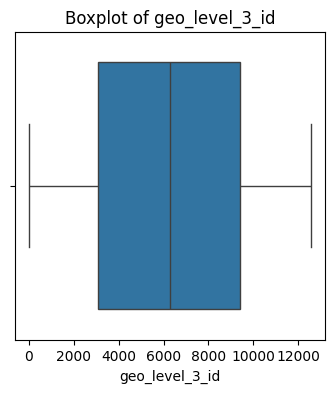

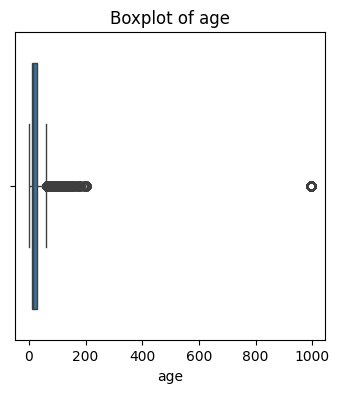

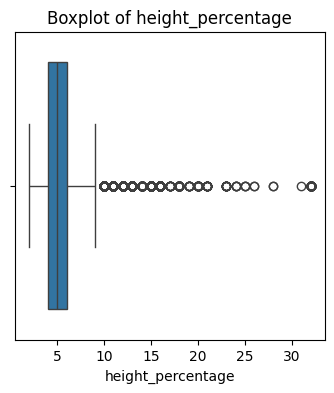

In [ ]:

import matplotlib.pyplot as plt
for col in outliers_data:
    plt.figure()
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Outliers are present in "age", "area_percentage","height_percentage"

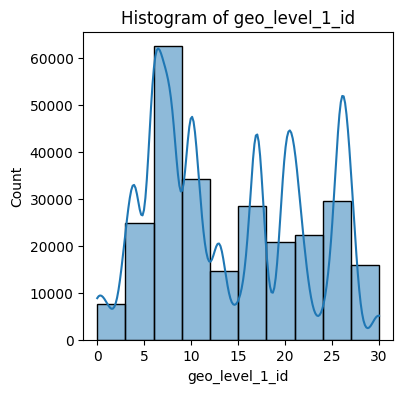

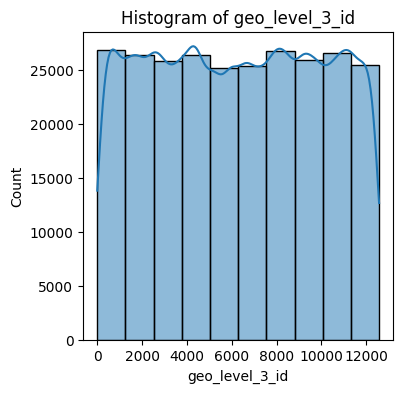

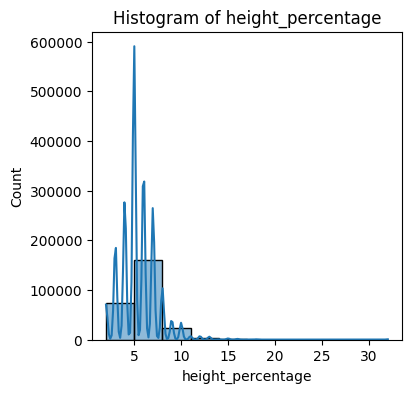

In [ ]:
import matplotlib.pyplot as plt
for col in outliers_data:
    plt.figure()
    sns.histplot(x=data[col], bins=10, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()


### Handling ouliers in age column

In [ ]:
# IQR Method
# Find Q1 and Q2
Q1 = data['age'].quantile(0.25)
print("lower quartile",Q1)
Q3 = data['age'].quantile(0.75)
print("upper quartile", Q3)

lower quartile 10.0
upper quartile 30.0


In [ ]:
# Find IQR
IQR1 = Q3-Q1
IQR1

20.0

In [ ]:
# find lower limit and upper limit
lower_limit=Q1-1.5*IQR1
print("lower_limit",lower_limit)
upper_limit=Q3+1.5*IQR1
print("upper_limit",upper_limit)



lower_limit -20.0
upper_limit 60.0


In [ ]:
# find values above upper limit
data.loc[data['age']>upper_limit]

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
24           519606              11             660            9780   
42           833827              17            1030            1525   
90           351011               5             853            1474   
124          767971              26             110           11672   
216          612661              11             883            2822   
...             ...             ...             ...             ...   
260480       359059              11             883            2822   
260541       798100              13            1365           11849   
260542       156434               8             696            7863   
260551       603724              24             563            9597   
260579       977263               8             696            4415   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
24                        2   80                5                  5   
42                        3   70               16                  7   
90                        2   70               11                  6   
124                       2   65                9                  7   
216                       5  100               12                 11   
...                     ...  ...              ...                ...   
260480                    5   80               11                 10   
260541                    1  100                6                  3   
260542                    2  995                8                  8   
260551                    2   70               10                  5   
260579                    2  995                4                  5   

       land_surface_condition foundation_type  ... has_secondary_use_hotel  \
24                          t               r  ...                       0   
42                          t               r  ...                       0   
90                          t               r  ...                       0   
124                         t               r  ...                       0   
216                         t               r  ...                       0   
...                       ...             ...  ...                     ...   
260480                      t               r  ...                       1   
260541                      t               r  ...                       0   
260542                      t               r  ...                       0   
260551                      t               r  ...                       0   
260579                      t               r  ...                       0   

       has_secondary_use_rental has_secondary_use_institution  \
24                            0                             0   
42                            0                             0   
90                            0                             0   
124                           0                             0   
216                           0                             0   
...                         ...                           ...   
260480                        0                             0   
260541                        0                             0   
260542                        0                             0   
260551                        0                             0   
260579                        0                             0   

       has_secondary_use_school has_secondary_use_industry  \
24                            0                          0   
42                            0                          0   
90                            0                          0   
124                           0                          0   
216                           0                          0   
...                         ...                        ...   
260480                        0                          0   
260541                        0                          0   
260542        

In [ ]:
# find values below lower limit
data.loc[data['age']<lower_limit]

Empty DataFrame
Columns: [building_id, geo_level_1_id, geo_level_2_id, geo_level_3_id, count_floors_pre_eq, age, area_percentage, height_percentage, land_surface_condition, foundation_type, roof_type, ground_floor_type, other_floor_type, position, plan_configuration, has_superstructure_adobe_mud, has_superstructure_mud_mortar_stone, has_superstructure_stone_flag, has_superstructure_cement_mortar_stone, has_superstructure_mud_mortar_brick, has_superstructure_cement_mortar_brick, has_superstructure_timber, has_superstructure_bamboo, has_superstructure_rc_non_engineered, has_superstructure_rc_engineered, has_superstructure_other, legal_ownership_status, count_families, has_secondary_use, has_secondary_use_agriculture, has_secondary_use_hotel, has_secondary_use_rental, has_secondary_use_institution, has_secondary_use_school, has_secondary_use_industry, has_secondary_use_health_post, has_secondary_use_gov_office, has_secondary_use_use_police, has_secondary_use_other, damage_grade]
Index: []

[0 rows x 40 columns]

In [ ]:
# to calculate percentage of outliers
len(data.loc[data['age']>upper_limit])/len(data)

0.047962210428969955

In [ ]:
# to calculate percentage of outliers
len(data.loc[data['age']<lower_limit])/len(data)

0.0

In [ ]:
# Here data is skewed and not normal, so replace outliers in age column with median
data.loc[data['age']>upper_limit,'age']=data['age'].median()

In [ ]:
# check if there are any outliers in "age" column
sns.boxplot(x=data.age)

<Axes: xlabel='age'>

## Handling outliers in area percentage

In [ ]:
# IQR Method
# Find Q1 and Q2
Q1 = data['area_percentage'].quantile(0.25)
print("lower quartile",Q1)
Q3 = data['area_percentage'].quantile(0.75)
print("upper quartile", Q3)

lower quartile 5.0
upper quartile 9.0


In [ ]:
# Find IQR
IQR2 = Q3-Q1
IQR2

4.0

In [ ]:
# find lower limit and upper limit
lower_limit=Q1-1.5*IQR2
print("lower_limit",lower_limit)
upper_limit=Q3+1.5*IQR2
print("upper_limit",upper_limit)



lower_limit -1.0
upper_limit 15.0


In [ ]:
# find values above upper limit
data.loc[data['area_percentage']>upper_limit]

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
19           483543               8              41            6024   
29           529366              27             548            1119   
42           833827              17            1030            1525   
63           767109               7            1356           11548   
71           708530              26              39           10795   
...             ...             ...             ...             ...   
260520       353176              26              39            9133   
260564        43915               5             940            3859   
260582       557125              20             385            1686   
260585       722577               6             744           10556   
260588       595396              27             269            6906   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
19                        2   20               16                  4   
29                        3   60               27                 10   
42                        3   15               16                  7   
63                        1    0               16                  2   
71                        1    0               17                  3   
...                     ...  ...              ...                ...   
260520                    1   10               17                  3   
260564                    2    0               16                  7   
260582                    1    5               27                  3   
260585                    2   45               17                  5   
260588                    3   35               17                  7   

       land_surface_condition foundation_type  ... has_secondary_use_hotel  \
19                          t               r  ...                       0   
29                          t               r  ...                       0   
42                          t               r  ...                       0   
63                          t               r  ...                       0   
71                          t               i  ...                       0   
...                       ...             ...  ...                     ...   
260520                      t               i  ...                       0   
260564                      t               r  ...                       0   
260582                      t               i  ...                       0   
260585                      t               r  ...                       0   
260588                      t               r  ...                       0   

       has_secondary_use_rental has_secondary_use_institution  \
19                            0                             0   
29                            0                             0   
42                            0                             0   
63                            0                             0   
71                            0                             0   
...                         ...                           ...   
260520                        0                             0   
260564                        0                             0   
260582                        0                             0   
260585                        0                             0   
260588                        0                             0   

       has_secondary_use_school has_secondary_use_industry  \
19                            0                          0   
29                            0                          0   
42                            0                          0   
63                            0                          0   
71                            0                          0   
...                         ...                        ...   
260520                        0                          0   
260564                        0                          0   
260582        

In [ ]:
# find values above upper limit
data.loc[data['area_percentage']<lower_limit]

Empty DataFrame
Columns: [building_id, geo_level_1_id, geo_level_2_id, geo_level_3_id, count_floors_pre_eq, age, area_percentage, height_percentage, land_surface_condition, foundation_type, roof_type, ground_floor_type, other_floor_type, position, plan_configuration, has_superstructure_adobe_mud, has_superstructure_mud_mortar_stone, has_superstructure_stone_flag, has_superstructure_cement_mortar_stone, has_superstructure_mud_mortar_brick, has_superstructure_cement_mortar_brick, has_superstructure_timber, has_superstructure_bamboo, has_superstructure_rc_non_engineered, has_superstructure_rc_engineered, has_superstructure_other, legal_ownership_status, count_families, has_secondary_use, has_secondary_use_agriculture, has_secondary_use_hotel, has_secondary_use_rental, has_secondary_use_institution, has_secondary_use_school, has_secondary_use_industry, has_secondary_use_health_post, has_secondary_use_gov_office, has_secondary_use_use_police, has_secondary_use_other, damage_grade]
Index: []

[0 rows x 40 columns]

In [ ]:
# to calculate percentage of outliers
len(data.loc[data['area_percentage']>upper_limit])/len(data)

0.05202205670738025

In [ ]:
# to calculate percentage of outliers
len(data.loc[data['area_percentage']<lower_limit])/len(data)

0.0

In [ ]:
# Here data is skewed and not normal, so replace outliers in area_percentage column with median
data.loc[data['area_percentage']>upper_limit,'area_percentage']=data['area_percentage'].median()

<Axes: xlabel='area_percentage'>

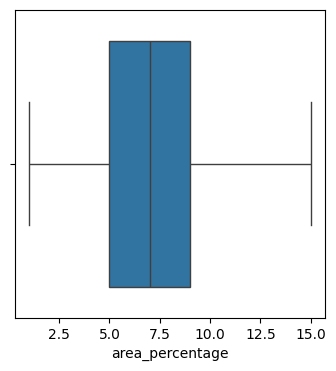

In [ ]:
# check if there are any outliers in "area_percentage" column
sns.boxplot(x=data.area_percentage)

## Handling outliers in height_percentage column

In [ ]:
# IQR Method
# Find Q1 and Q2
Q1 = data['height_percentage'].quantile(0.25)
print("lower quartile",Q1)
Q3 = data['height_percentage'].quantile(0.75)
print("upper quartile", Q3)

lower quartile 4.0
upper quartile 6.0


In [ ]:
# Find IQR
IQR3 = Q3-Q1
IQR3

2.0

In [ ]:
# find lower limit and upper limit
lower_limit=Q1-1.5*IQR3
print("lower_limit",lower_limit)
upper_limit=Q3+1.5*IQR3
print("upper_limit",upper_limit)



lower_limit 1.0
upper_limit 9.0


In [ ]:
# find values above upper limit
data.loc[data['height_percentage']>upper_limit]

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
29           529366              27             548            1119   
113          871860               3            1387            8014   
120          824847               3            1387            8014   
144          301655              26             110            7692   
187          213830              17             721            6677   
...             ...             ...             ...             ...   
260480       359059              11             883            2822   
260492       170782              11             660            4377   
260545       324651              10             603           12101   
260589       858025               6             673           12181   
260594       159555              27             181            1537   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
29                        3   60                7                 10   
113                       5   30                6                 10   
120                       5   60                3                 10   
144                       3   55               11                 10   
187                       3   20                2                 32   
...                     ...  ...              ...                ...   
260480                    5   15               11                 10   
260492                    4   50                4                 10   
260545                    3    0               13                 10   
260589                    3   15               11                 11   
260594                    6    0               13                 12   

       land_surface_condition foundation_type  ... has_secondary_use_hotel  \
29                          t               r  ...                       0   
113                         t               r  ...                       0   
120                         t               r  ...                       1   
144                         t               r  ...                       0   
187                         t               r  ...                       0   
...                       ...             ...  ...                     ...   
260480                      t               r  ...                       1   
260492                      t               r  ...                       0   
260545                      n               i  ...                       0   
260589                      t               i  ...                       0   
260594                      t               r  ...                       0   

       has_secondary_use_rental has_secondary_use_institution  \
29                            0                             0   
113                           0                             0   
120                           0                             0   
144                           0                             0   
187                           0                             0   
...                         ...                           ...   
260480                        0                             0   
260492                        0                             0   
260545                        0                             0   
260589                        0                             0   
260594                        0                             0   

       has_secondary_use_school has_secondary_use_industry  \
29                            0                          0   
113                           0                          0   
120                           0                          0   
144                           0                          0   
187                           0                          0   
...                         ...                        ...   
260480                        0                          0   
260492                        0                          0   
260545        

In [ ]:
# find values above upper limit
data.loc[data['height_percentage']<lower_limit]

Empty DataFrame
Columns: [building_id, geo_level_1_id, geo_level_2_id, geo_level_3_id, count_floors_pre_eq, age, area_percentage, height_percentage, land_surface_condition, foundation_type, roof_type, ground_floor_type, other_floor_type, position, plan_configuration, has_superstructure_adobe_mud, has_superstructure_mud_mortar_stone, has_superstructure_stone_flag, has_superstructure_cement_mortar_stone, has_superstructure_mud_mortar_brick, has_superstructure_cement_mortar_brick, has_superstructure_timber, has_superstructure_bamboo, has_superstructure_rc_non_engineered, has_superstructure_rc_engineered, has_superstructure_other, legal_ownership_status, count_families, has_secondary_use, has_secondary_use_agriculture, has_secondary_use_hotel, has_secondary_use_rental, has_secondary_use_institution, has_secondary_use_school, has_secondary_use_industry, has_secondary_use_health_post, has_secondary_use_gov_office, has_secondary_use_use_police, has_secondary_use_other, damage_grade]
Index: []

[0 rows x 40 columns]

In [ ]:
# to calculate percentage of outliers
len(data.loc[data['height_percentage']>upper_limit])/len(data)

0.030095816976911063

In [ ]:
# to calculate percentage of outliers
len(data.loc[data['height_percentage']<lower_limit])/len(data)

0.0

In [ ]:
# Here data is skewed and not normal, so replace outliers in height_percentage column with median
data.loc[data['height_percentage']>upper_limit,'height_percentage']=data['height_percentage'].median()

<Axes: xlabel='height_percentage'>

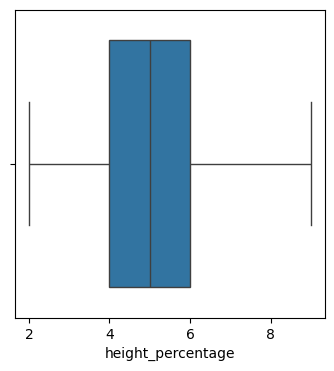

In [ ]:
sns.boxplot(x=data.height_percentage)

In [ ]:
data.head(5)

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                      t               r  ...                       0   
1                      o               r  ...                       0   
2                      t               r  ...                       0   
3                      t               r  ...                       0   
4                      t               r  ...                       0   

  has_secondary_use_rental has_secondary_use_institution  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

  has_secondary_use_school has_secondary_use_industry  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   has_secondary_use_use_police  has_secondary_use_other  damage_grade  
0                             0                        0             3  
1                             0                        0             2  
2                             0                        0             3  
3                             0                        0             2  
4                             0                        0             3  

[5 rows x 40 columns]

In [ ]:
A = pd.set_option('display.max_columns', None)
A

In [ ]:

data

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1                         2   10                8                  7   
2                         2   10                5                  5   
3                         2   10                6                  5   
4                         3   30                8                  9   
...                     ...  ...              ...                ...   
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

       land_surface_condition foundation_type roof_type ground_floor_type  \
0                           t               r         n                 f   
1                           o               r         n                 x   
2                           t               r         n                 f   
3                           t               r         n                 f   
4                           t               r         n                 f   
...                       ...             ...       ...               ...   
260596                      n               r         n                 f   
260597                      t               r         n                 f   
260598                      t               r         q                 f   
260599                      t               r         x                 v   
260600                      n               r         n                 f   

       other_floor_type position plan_configuration  \
0                     q        t                  d   
1                     q        s                  d   
2                     x        t                  d   
3                     x        s                  d   
4                     x        s                  d   
...                 ...      ...                ...   
260596                j        s                  q   
260597                q        s                  d   
260598                q        s                  d   
260599                s        j                  d   
260600                q        j                  d   

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                                  1                                    1   
1                                  0                                    1   
2                                  0                                    1   
3                                  0                                    1   
4                                  1                                    0   
...                              ...                                  ...   
260596                             0                                    1   
260597                             0                                    1   
260598     

# Scaling

In [ ]:
# Apply scaling
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler() # initialize model
data[["age",'area_percentage','height_percentage','geo_level_1_id','geo_level_2_id','geo_level_3_id']]=scaling.fit_transform(data[["age",'area_percentage','height_percentage','geo_level_1_id','geo_level_2_id','geo_level_3_id']])



In [ ]:
data.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906        0.200000        0.341275        0.970637   
1        28830        0.266667        0.630694        0.223761   
2        94947        0.700000        0.254380        0.714013   
3       590882        0.733333        0.292922        0.850959   
4       201944        0.366667        0.091801        0.118405   

   count_floors_pre_eq       age  area_percentage  height_percentage  \
0                    2  0.500000         0.357143           0.428571   
1                    2  0.166667         0.500000           0.714286   
2                    2  0.166667         0.285714           0.428571   
3                    2  0.166667         0.357143           0.428571   
4                    3  0.500000         0.500000           1.000000   

  land_surface_condition foundation_type roof_type ground_floor_type  \
0                      t               r         n                 f   
1                      o               r         n                 x   
2                      t               r         n                 f   
3                      t               r         n                 f   
4                      t               r         n                 f   

  other_floor_type position plan_configuration  has_superstructure_adobe_mud  \
0                q        t                  d                             1   
1                q        s                  d                             0   
2                x        t                  d                             0   
3                x        s                  d                             0   
4                x        s                  d                             1   

   has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
0                                    1                              0   
1                                    1                              0   
2                                    1                              0   
3                                    1                              0   
4                                    0                              0   

   has_superstructure_cement_mortar_stone  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   has_superstructure_mud_mortar_brick  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                                       0                          0   
1                                       0                          0   
2                                       0                          0   
3                                       0                          1   
4                                       0                          0   

   has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0                          0                                     0   
1                          0                                     0   
2                          0                                     0   
3                          1                                     0   
4                          0                                     0   

   has_superstructure_rc_engineered  has_superstructure_other  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

  legal_ownership_status  count_families  has_secon

# Converting categorical data into numerical data

# Label Encoding

In [ ]:
cat_col.columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

In [ ]:
data_3=data.copy()

In [ ]:
# using label encoder to convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_3.land_surface_condition=le.fit_transform(data_3.land_surface_condition)
data_3.foundation_type=le.fit_transform(data_3.foundation_type)
data_3.roof_type=le.fit_transform(data_3.roof_type)
data_3.ground_floor_type=le.fit_transform(data_3.ground_floor_type)
data_3.other_floor_type=le.fit_transform(data_3.other_floor_type)
data_3.position=le.fit_transform(data_3.position)
data_3.plan_configuration=le.fit_transform(data_3.plan_configuration)
data_3.legal_ownership_status=le.fit_transform(data_3.legal_ownership_status)


In [ ]:
data_3

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906        0.200000        0.341275        0.970637   
1             28830        0.266667        0.630694        0.223761   
2             94947        0.700000        0.254380        0.714013   
3            590882        0.733333        0.292922        0.850959   
4            201944        0.366667        0.091801        0.118405   
...             ...             ...             ...             ...   
260596       688636        0.833333        0.935529        0.128989   
260597       669485        0.566667        0.501051        0.163921   
260598       602512        0.566667        0.035739        0.649558   
260599       151409        0.866667        0.027330        0.147291   
260600       747594        0.700000        0.006307        0.724198   

        count_floors_pre_eq       age  area_percentage  height_percentage  \
0                         2  0.500000         0.357143           0.428571   
1                         2  0.166667         0.500000           0.714286   
2                         2  0.166667         0.285714           0.428571   
3                         2  0.166667         0.357143           0.428571   
4                         3  0.500000         0.500000           1.000000   
...                     ...       ...              ...                ...   
260596                    1  0.916667         0.357143           0.142857   
260597                    2  0.000000         0.357143           0.428571   
260598                    3  0.916667         0.357143           0.714286   
260599                    2  0.166667         0.928571           0.571429   
260600                    3  0.166667         0.428571           0.571429   

        land_surface_condition  foundation_type  roof_type  ground_floor_type  \
0                            2                2          0                  0   
1                            1                2          0                  3   
2                            2                2          0                  0   
3                            2                2          0                  0   
4                            2                2          0                  0   
...                        ...              ...        ...                ...   
260596                       0                2          0                  0   
260597                       2                2          0                  0   
260598                       2                2          1                  0   
260599                       2                2          2                  2   
260600                       0                2          0                  0   

        other_floor_type  position  plan_configuration  \
0                      1         3                   2   
1                      1         2                   2   
2                      3         3                   2   
3                      3         2                   2   
4                      3         2                   2   
...                  ...       ...                 ...   
260596                 0         2                   7   
260597                 1         2                   2   
260598                 1         2                   2   
260599                 2         0                   2   
260600                 1         0                   2   

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                                  1                                    1   
1                                  0                                    1   
2                                  0                                    1   
3                                  0                                    1   
4                                  1                                    0   
...                              ...                                  ...   
260596               

# Feature Engineering

In [ ]:
data_3.drop('building_id', axis=1, inplace=True)

In [ ]:
data_3

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  \
0            -0.983414       -0.518705        1.629055                    2   
1            -0.734459        0.481998       -0.945017                    2   
2             0.883744       -0.819158        0.744612                    2   
3             1.008221       -0.685893        1.216589                    2   
4            -0.361028       -1.381296       -1.308119                    3   
...                ...             ...             ...                  ...   
260596        1.381653        1.536007       -1.271644                    1   
260597        0.385835        0.033741       -1.151250                    2   
260598        0.385835       -1.575137        0.522472                    3   
260599        1.506130       -1.604213       -1.208568                    2   
260600        0.883744       -1.676903        0.779715                    3   

             age  area_percentage  height_percentage  land_surface_condition  \
0       0.047100        -0.459460          -0.226419                       2   
1      -0.224765        -0.004110           0.816109                       1   
2      -0.224765        -0.687135          -0.226419                       2   
3      -0.224765        -0.459460          -0.226419                       2   
4       0.047100        -0.004110           1.858636                       2   
...          ...              ...                ...                     ...   
260596  0.386932        -0.459460          -1.268946                       0   
260597 -0.360698        -0.459460          -0.226419                       2   
260598  0.386932        -0.459460           0.816109                       2   
260599 -0.224765         1.361941           0.294845                       2   
260600 -0.224765        -0.231785           0.294845                       0   

        foundation_type  roof_type  ground_floor_type  other_floor_type  \
0                     2          0                  0                 1   
1                     2          0                  3                 1   
2                     2          0                  0                 3   
3                     2          0                  0                 3   
4                     2          0                  0                 3   
...                 ...        ...                ...               ...   
260596                2          0                  0                 0   
260597                2          0                  0                 1   
260598                2          1                  0                 1   
260599                2          2                  2                 2   
260600                2          0                  0                 1   

        position  plan_configuration  has_superstructure_adobe_mud  \
0              3                   2                             1   
1              2                   2                             0   
2              3                   2                             0   
3              2                   2                             0   
4              2                   2                             1   
...          ...                 ...                           ...   
260596         2                   7                             0   
260597         2                   2                             0   
260598         2                   2                             0   
260599         0                   2                             0   
260600         0                   2                             0   

        has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
0                                         1                              0   
1                                         1                              0   
2                                         1                              0   
3                                         1 

In [ ]:
# saving the preprocessed the data
data_3.to_csv('Preprocessed_data.csv')

In [ ]:
# load the preprocessed data
preprocessed_data=pd.read_csv('Preprocessed_data.csv')

In [ ]:
preprocessed_data

Unnamed: 0  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0                0        0.200000        0.341275        0.970637   
1                1        0.266667        0.630694        0.223761   
2                2        0.700000        0.254380        0.714013   
3                3        0.733333        0.292922        0.850959   
4                4        0.366667        0.091801        0.118405   
...            ...             ...             ...             ...   
260596      260596        0.833333        0.935529        0.128989   
260597      260597        0.566667        0.501051        0.163921   
260598      260598        0.566667        0.035739        0.649558   
260599      260599        0.866667        0.027330        0.147291   
260600      260600        0.700000        0.006307        0.724198   

        count_floors_pre_eq       age  area_percentage  height_percentage  \
0                         2  0.500000         0.357143           0.428571   
1                         2  0.166667         0.500000           0.714286   
2                         2  0.166667         0.285714           0.428571   
3                         2  0.166667         0.357143           0.428571   
4                         3  0.500000         0.500000           1.000000   
...                     ...       ...              ...                ...   
260596                    1  0.916667         0.357143           0.142857   
260597                    2  0.000000         0.357143           0.428571   
260598                    3  0.916667         0.357143           0.714286   
260599                    2  0.166667         0.928571           0.571429   
260600                    3  0.166667         0.428571           0.571429   

        land_surface_condition  foundation_type  roof_type  ground_floor_type  \
0                            2                2          0                  0   
1                            1                2          0                  3   
2                            2                2          0                  0   
3                            2                2          0                  0   
4                            2                2          0                  0   
...                        ...              ...        ...                ...   
260596                       0                2          0                  0   
260597                       2                2          0                  0   
260598                       2                2          1                  0   
260599                       2                2          2                  2   
260600                       0                2          0                  0   

        other_floor_type  position  plan_configuration  \
0                      1         3                   2   
1                      1         2                   2   
2                      3         3                   2   
3                      3         2                   2   
4                      3         2                   2   
...                  ...       ...                 ...   
260596                 0         2                   7   
260597                 1         2                   2   
260598                 1         2                   2   
260599                 2         0                   2   
260600                 1         0                   2   

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                                  1                                    1   
1                                  0                                    1   
2                                  0                                    1   
3                                  0                                    1   
4                                  1                                    0   
...                              ...                                  ...   
260596                           

In [ ]:
# remove redundant column:unnamed
preprocessed_data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906        0.200000        0.341275        0.970637   
1        28830        0.266667        0.630694        0.223761   
2        94947        0.700000        0.254380        0.714013   
3       590882        0.733333        0.292922        0.850959   
4       201944        0.366667        0.091801        0.118405   

   count_floors_pre_eq       age  area_percentage  height_percentage  \
0                    2  0.500000         0.357143           0.428571   
1                    2  0.166667         0.500000           0.714286   
2                    2  0.166667         0.285714           0.428571   
3                    2  0.166667         0.357143           0.428571   
4                    3  0.500000         0.500000           1.000000   

  land_surface_condition foundation_type roof_type ground_floor_type  \
0                      t               r         n                 f   
1                      o               r         n                 x   
2                      t               r         n                 f   
3                      t               r         n                 f   
4                      t               r         n                 f   

  other_floor_type position plan_configuration  has_superstructure_adobe_mud  \
0                q        t                  d                             1   
1                q        s                  d                             0   
2                x        t                  d                             0   
3                x        s                  d                             0   
4                x        s                  d                             1   

   has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
0                                    1                              0   
1                                    1                              0   
2                                    1                              0   
3                                    1                              0   
4                                    0                              0   

   has_superstructure_cement_mortar_stone  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   has_superstructure_mud_mortar_brick  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                                       0                          0   
1                                       0                          0   
2                                       0                          0   
3                                       0                          1   
4                                       0                          0   

   has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0                          0                                     0   
1                          0                                     0   
2                          0                                     0   
3                          1                                     0   
4                          0                                     0   

   has_superstructure_rc_engineered  has_superstructure_other  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

  legal_ownership_status  count_families  has_secon

In [ ]:
preprocessed_data

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  \
0             0.200000        0.341275        0.970637                    2   
1             0.266667        0.630694        0.223761                    2   
2             0.700000        0.254380        0.714013                    2   
3             0.733333        0.292922        0.850959                    2   
4             0.366667        0.091801        0.118405                    3   
...                ...             ...             ...                  ...   
260596        0.833333        0.935529        0.128989                    1   
260597        0.566667        0.501051        0.163921                    2   
260598        0.566667        0.035739        0.649558                    3   
260599        0.866667        0.027330        0.147291                    2   
260600        0.700000        0.006307        0.724198                    3   

             age  area_percentage  height_percentage  land_surface_condition  \
0       0.500000         0.357143           0.428571                       2   
1       0.166667         0.500000           0.714286                       1   
2       0.166667         0.285714           0.428571                       2   
3       0.166667         0.357143           0.428571                       2   
4       0.500000         0.500000           1.000000                       2   
...          ...              ...                ...                     ...   
260596  0.916667         0.357143           0.142857                       0   
260597  0.000000         0.357143           0.428571                       2   
260598  0.916667         0.357143           0.714286                       2   
260599  0.166667         0.928571           0.571429                       2   
260600  0.166667         0.428571           0.571429                       0   

        foundation_type  roof_type  ground_floor_type  other_floor_type  \
0                     2          0                  0                 1   
1                     2          0                  3                 1   
2                     2          0                  0                 3   
3                     2          0                  0                 3   
4                     2          0                  0                 3   
...                 ...        ...                ...               ...   
260596                2          0                  0                 0   
260597                2          0                  0                 1   
260598                2          1                  0                 1   
260599                2          2                  2                 2   
260600                2          0                  0                 1   

        position  plan_configuration  has_superstructure_adobe_mud  \
0              3                   2                             1   
1              2                   2                             0   
2              3                   2                             0   
3              2                   2                             0   
4              2                   2                             1   
...          ...                 ...                           ...   
260596         2                   7                             0   
260597         2                   2                             0   
260598         2                   2                             0   
260599         0                   2                             0   
260600         0                   2                             0   

        has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
0                                         1                              0   
1                                         1                              0   
2                                         1                              0   
3                                         1 

In [ ]:
preprocessed_data.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
     

In [ ]:

# check correlation on numerical columns and continuous data
corr_data=preprocessed_data[['geo_level_1_id','geo_level_2_id','geo_level_3_id','age','area_percentage','height_percentage','damage_grade']]

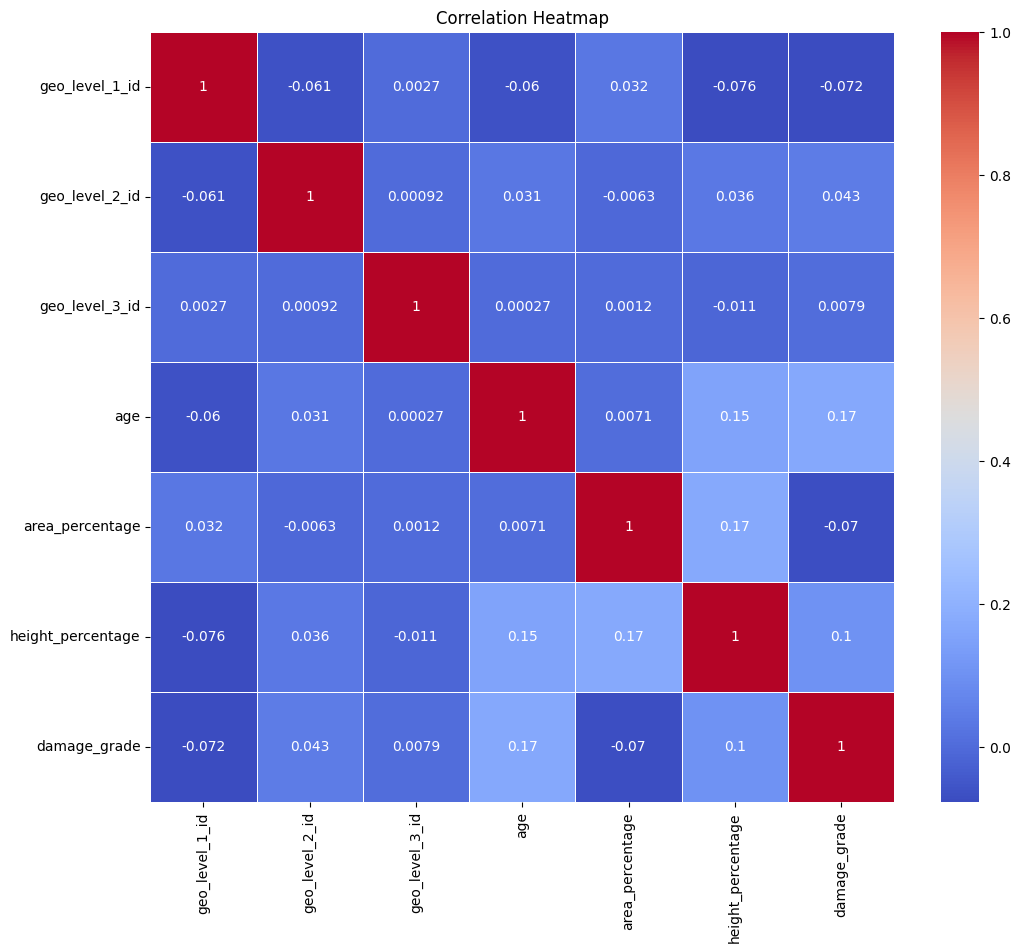

In [ ]:
 #Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
preprocessed_data.drop(['geo_level_1_id','area_percentage','count_floors_pre_eq'], axis=1, inplace=True)

# **Split data into x and y**

In [ ]:
x=preprocessed_data.drop('damage_grade',axis=1)
y=preprocessed_data['damage_grade']

In [ ]:
# creating traning and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3)

In [ ]:
x_train.shape

(182420, 38)

In [ ]:
x_test.shape

(78181, 38)

# Balancing data

In [ ]:
# balancing data
preprocessed_data.damage_grade.value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

data is imbalanced and will balance this using SMOTE

#SMOTE

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
# SMOTE is always applied on trained data (x_train, y_train)
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [ ]:
from collections import Counter
print("Actual Classes", Counter(y_train))
print("SMOTE Classes", Counter(y_smote))
# finding the shape of trained data
# as .shape will not work, so use Counter

Actual Classes Counter({2: 103726, 3: 61095, 1: 17599})
SMOTE Classes Counter({2: 103726, 3: 103726, 1: 103726})


##**Model Building**

### **Logistic Regression**

In [ ]:
# Import Linear Regression Library
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# make predictions/test model
y_pred=model_lr.predict(x_test)
y_pred

array([2, 2, 2, ..., 2, 3, 2])

In [ ]:
# compare y_pred with y_test
y_test

116327    2
157281    2
43653     2
254864    3
54589     3
         ..
189224    3
5488      2
143598    3
161808    2
158735    3
Name: damage_grade, Length: 78181, dtype: int64

In [ ]:
df=y_test.copy()

In [ ]:
df['y_pred']=y_pred

In [ ]:
df

116327                                                    2
157281                                                    2
43653                                                     2
254864                                                    3
54589                                                     3
                                ...                        
5488                                                      2
143598                                                    3
161808                                                    2
158735                                                    3
y_pred    [2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, ...
Name: damage_grade, Length: 78182, dtype: object

## **Evaluate Model**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 2266,  5145,   114],
       [ 1525, 40020,  2988],
       [  115, 22442,  3566]])

In [ ]:
accuracy_score(y_test,y_pred)

0.5864852074033333

In [ ]:
precision_score(y_test,y_pred,average='weighted')


0.5717147862815816

In [ ]:
recall_score(y_test,y_pred, average='weighted')

0.5864852074033333

In [ ]:
# prompt: code for f1_score

f1_score(y_test,y_pred,average='weighted')


0.5173965791275472

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.58      0.30      0.40      7525
           2       0.59      0.90      0.71     44533
           3       0.53      0.14      0.22     26123

    accuracy                           0.59     78181
   macro avg       0.57      0.45      0.44     78181
weighted avg       0.57      0.59      0.52     78181



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'sag'],
    'max_iter': [100, 200]
}

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)

In [ ]:
# Fit the grid search object to the data
grid_search.fit(x_smote, y_smote)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 200],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'sag']})

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best hyperparameters:", best_params)


Best hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Train the model with the best hyperparameters
model_best = LogisticRegression(**best_params)
model_best.fit(x_smote, y_smote)


LogisticRegression(C=0.1, solver='liblinear')

In [ ]:
# Evaluate the model with the best hyperparameters
y_pred = model_best.predict(x_test)



In [ ]:
accuracy_score(y_test, y_pred)

0.4667374426011435

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=2)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.6098924291068162

In [ ]:
# how to select k value
error_rate = []
for k in range(1,11):
  KNN=KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_smote,y_smote)
  y_pred=KNN.predict(x_test)
  error_rate.append(np.mean(y_pred!=y_test))

In [ ]:
error_rate

[0.4377534183497269,
 0.4499942441258106,
 0.46127575753699745,
 0.45393382023765366,
 0.46511300699658487,
 0.464153694631688,
 0.4701014312940484,
 0.46990956882106905,
 0.47786546603394686,
 0.4734398383238894]

In [ ]:
plt.plot(range(1,11),error_rate,color='blue',marker='o',markerfacecolor='red')
plt.xlabel('k')
plt.ylabel("error")
plt.title("k v/s error")

Text(0.5, 1.0, 'k v/s error')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_smote,y_smote)
y_pred=KNN.predict(x_test)

In [ ]:
# Print the metrics for KNN
print("Classification Report for SVM:\n\n", classification_report(y_test, y_pred))
print("Accuracy Score for SVM:", accuracy_score(y_test, y_pred))
print("F1 Score for SVM", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix for SVM:\n\n", confusion_matrix(y_test, y_pred))

Classification Report for SVM:

               precision    recall  f1-score   support

           1       0.39      0.60      0.47      7525
           2       0.65      0.76      0.70     44533
           3       0.65      0.35      0.46     26123

    accuracy                           0.61     78181
   macro avg       0.56      0.57      0.54     78181
weighted avg       0.62      0.61      0.60     78181

Accuracy Score for SVM: 0.6098924291068162
F1 Score for SVM 0.5970911572190406
Confusion Matrix for SVM:

 [[ 4502  2808   215]
 [ 5795 33980  4758]
 [ 1233 15690  9200]]


# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
model_bag=BaggingClassifier(base_estimator=model_lr,n_estimators=200)
model_bag.fit(x_train,y_train)
y_pred=model_bag.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.5861782274465663

In [ ]:
# Print the metrics for Bagging Classifier
print("Classification Report for Bagging Classifier:\n\n", classification_report(y_test, y_pred))
print("Accuracy Score for Bagging Classifier:", accuracy_score(y_test, y_pred))
print("F1 Score for Bagging Classifier", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix for Bagging Classifier:\n\n", confusion_matrix(y_test, y_pred))

Classification Report for Bagging Classifier:

               precision    recall  f1-score   support

           1       0.58      0.30      0.40      7525
           2       0.59      0.90      0.71     44533
           3       0.53      0.13      0.21     26123

    accuracy                           0.59     78181
   macro avg       0.57      0.45      0.44     78181
weighted avg       0.57      0.59      0.52     78181

Accuracy Score for Bagging Classifier: 0.5861782274465663
F1 Score for Bagging Classifier 0.5166056181438039
Confusion Matrix for Bagging Classifier:

 [[ 2276  5135   114]
 [ 1535 40036  2962]
 [  117 22490  3516]]


# SVC Classifier



In [ ]:
from sklearn.svm import SVC
svclassifier = SVC()
svclassifier.fit(x_train,y_train)

SVC()

In [ ]:
# predict output for x_test
y_pred = svclassifier.predict(x_test)

# Model evaluation


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 4890,  1108,  1527],
       [ 6411, 12389, 25733],
       [ 1279,  5238, 19606]])

In [ ]:
accuracy_score(y_test,y_pred)

0.4717898210562669

In [ ]:
precision_score(y_test,y_pred,average='weighted')


0.5538684443664866

In [ ]:
recall_score(y_test,y_pred, average='weighted')

0.4717898210562669

In [ ]:
f1_score(y_test,y_pred,average='weighted')


0.44940991773542877

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.39      0.65      0.49      7525
           2       0.66      0.28      0.39     44533
           3       0.42      0.75      0.54     26123

    accuracy                           0.47     78181
   macro avg       0.49      0.56      0.47     78181
weighted avg       0.55      0.47      0.45     78181



In [ ]:
# Print the metrics for SVM
print("Classification Report for SVM:\n\n", classification_report(y_test, y_pred))
print("Accuracy Score for SVM:", accuracy_score(y_test, y_pred))
print("F1 Score for SVM", f1_score(y_test, y_pred_svm, average='weighted'))
print("Confusion Matrix for SVM:\n\n", confusion_matrix(y_test, y_pred))

In [ ]:
# check cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,x,y,cv=10,scoring='f1')
print(scores)
print("cross validation score",scores.std())

# Hyperparameter tuning in SVC

In [ ]:
# grid search cv
from sklearn.model_selection import GridSearchCV
# define hyperparameter range
param_grid = {'C':[0.1,5,10,50,60,70],'gamma':[1,0.1,0.01,0.001,0.2],'random_state':list(range(1,20))}
model = SVC()
grid=GridSearchCV(model, param_grid,verbose=2,scoring='f1',cv=5)
grid.fit(x,y)

In [ ]:
print(grid.best_params_)

In [ ]:
model=SVC(c=, gamma=, random_state=)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
f1_score(y_test,y_pred)

# Decision tree

In [ ]:
# prompt: code for model building of Decision tree

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)



DecisionTreeClassifier()

In [ ]:
y_pred=model_dt.predict(x_test)


In [ ]:
accuracy_score(y_test,y_pred)

0.6454381499341272

# Hyperparameter tuning in Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1, 11)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11))
}

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)


In [ ]:
# Fit the grid search object to the data
grid_search.fit(x_train, y_train)


In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best hyperparameters:", best_params)


In [ ]:
# Train the model with the best hyperparameters
model_best = DecisionTreeClassifier(**best_params)
model_best.fit(x_train, y_train)

In [ ]:
# Evaluate the model with the best hyperparameters
y_pred = model_best.predict(x_test)

accuracy_score(y_test, y_pred)

# Random Forest

In [ ]:
!pip install sklearn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Random Forest Classifier
model_rf=RandomForestClassifier()
model_rf.fit(x_smote,y_smote)


RandomForestClassifier()

In [ ]:
y_pred=model_rf.predict(x_test)


# model evaluation

In [ ]:
accuracy_score(y_test,y_pred)

0.6014888527903199

#Gradient Boosting

In [ ]:
# Model building
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(n_estimators=120)
GB.fit(x_train,y_train)
y_pred=GB.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
accuracy_score(y_test,y_pred)

0.5785676826850513

In [ ]:
# prompt: code for f1_score

f1_score(y_test,y_pred,average='weighted')


0.5807492307704477

# Hyperparameter tuning in Gradient boosting

In [ ]:
# Hyperparameter tuning in Gradient Boosting
param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3],
             'max_depth': [None, 5, 10, 20],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}
model = GradientBoostingClassifier()


In [ ]:
grid = GridSearchCV(model, param_grid, verbose=2, scoring='f1',cv=5)
grid.fit(x,y)
print(grid.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [ ]:
model=GradientBoostingClassifier(learning_rate=0.01, max_depth=None, min_samples_leaf=1, min_samples_split=2)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)
f1_score(y_test,y_pred)

NotFittedError: This GradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# **Naive Bayes**

In [ ]:

# Applying Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
nb.fit(x_smote,y_smote)
y_pred_nb=nb.predict(x_test)


In [ ]:
# Print the metrics for Naive Bayes
print("Classification Report for Naive Bayes:\n\n", classification_report(y_test, y_pred_nb))
print("Accuracy Score for Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print("F1 Score for Naive Bayes", f1_score(y_test, y_pred_nb, average='weighted'))
print("Confusion Matrix for Naive Bayes:\n\n", confusion_matrix(y_test, y_pred_nb))

 # **AdaBoost**

In [ ]:
# Applying AdaBoost model
from sklearn.ensemble import AdaBoostClassifier
model_adb=AdaBoostClassifier(random_state=3)
adb.fit(x_train,y_train)
y_pred_adb=adb.predict(x_test)


NameError: name 'adb' is not defined

In [ ]:
# Print the metrics for AdaBoost
print("Classification Report for AdaBoost:\n\n", classification_report(y_test, y_pred_adb))
print("Accuracy Score for AdaBoost:", accuracy_score(y_test, y_pred_adb))
print("F1 Score for AdaBoost", f1_score(y_test, y_pred_adb, average='weighted'))
print("Confusion Matrix for AdaBoost:\n\n", confusion_matrix(y_test, y_pred_adb))

In [ ]:


models = [model_lr, svclassifier, model_dt, model_rf, KNN, model_nb, GB, model_adb]
names = ["Logistic Regression", "SVM", "Decision Tree", "Random Forest", "KNN", "Naive Bayes", "Gradient Boosting", "AdaBoost"]

print("Model Comparison:")
for model, name in zip(models, names):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  print(f"{name}:")
  print(f"  Accuracy: {accuracy:.3f}")
  print(f"  F1 Score: {f1:.3f}")
  print()


NameError: name 'svclassifier' is not defined